<a href="https://colab.research.google.com/github/Jhilam-Moumit/CSE_4102/blob/main/eda_predicting_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="visualizaion-container" style="background-color: #FDEFDA; padding: 20px; border: 2px solid #4d002e; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h3 style="color: #4d002e; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 30px; text-align: center; margin: 0;">Comprehensive Analysis and Prediction of Mental Health Indicators in University Students</h3>
    <h6 style="color: #4d002e; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 18px; text-align: center; margin: 0;">Insights from Demographic Factors, Model Performance, and Data Correlations</h6>
    <ol style="margin-left: 20px; font-size: 18px; color: #333;">
        <strong><li><strong>Problem Statement</strong></li>
        <li><strong>Data Collection</strong></li>
        <li><strong>Data Exploration</strong></li>
        <li><strong>Data Exploration (Visualization)</strong></li>
        <li><strong>Data Preprocessing</strong></li>
        <li><strong>Model Training</strong></li>
        <li><strong>Model Evaluation</strong></li>
        <li><strong>Conclusion</strong></li>
    </ol>
</div>



<div style="border-radius: 10px; border: 2px solid #9FA2B2; padding: 20px; background-color: #ECFFE6; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
    <h3 style="color: #164B01; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-bottom: 10px;"><span style="color: #164B01 ;"> 1.</span>  Problem Statement</h3>
    <p style="font-size: 18px; color: #000000;">The aim of this analysis is to investigate the impact of different factors (such as gender, departmental affiliation, age, scholarship status and many more) on the levels of academic anxiety, stress, and depression among university students.By achieving this aim, the study intends to sevelop predictive models to estimate the likelihood of students experiencing academic anxiety, stress, and depression.</p>
</div>


<div style="border-radius: 10px; border: 2px solid #9FA2B2; padding: 20px; background-color: #ECFFE6; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">

<h3 style="color: #164B01; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-top: 20px;"><span style="color: #164B01 ;"> 2.</span>  Data Collection</h3>
    <p style="font-size: 18px; color: #333;"><strong>Dataset Source:</strong> <a href="https://www.kaggle.com/datasets/mohsenzergani/bangladeshi-university-students-mental-health/data" target="_blank" style="color: #17A05D;">Kaggle Dataset</a></p>
    <p style="font-size: 18px; color: #333;">The dataset consists of 39 columns and 1977 rows.</p>
</div>


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;"> 2.1 </span>  Import Data and Required Packages</h3>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv("/content/Raw Data.csv")

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;"> 2.2 </span>  Show Top 5 Records</h3>
</div>


In [3]:
df.head(5)

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


<div class="analysis-container" style="background-color: #ECFFE6; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h3 style="color: #164B01; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"><span style="color: #164B01 ;"> 3.</span>  Data Checks to Perform</h3>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #333;">
        <li>Check Shape Of Data</li>
        <li>Check Columns</li>
        <li>Check Unique Values and Unique Value Count</li>
        <li>Check Datatypes Of Columns</li>
        <li>Check Duplicate Values</li>
        <li>Check Missing Values</li>
        <li>Check Statistics Of Data</li>
        <li>Check Numerical And Categorical Columns</li>
    </ul>
</div>


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;"> 3.1 </span>  Check Shape Of Data</h3>
</div>


In [4]:
df.shape

(1977, 39)

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.2 </span>  Check Columns </h3>
</div>


In [5]:
df.columns

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if something awful might happen?',
       'Anxiety Value', 'Anxiety Label',
       '1. In a semester, how often have you felt upset due

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.2.1 </span>  Mapping Columns Names to Shorter Identifiers</h3>
</div>


In [6]:
column_mapping = {
    "1. Age":"Age",
    "2. Gender":"Gender",
    "3. University":"University",
    "4. Department":"Department",
    "5. Academic Year":"Academic Year",
    "6. Current CGPA":"Current CGPA",
    '7. Did you receive a waiver or scholarship at your university?': 'Waiver/Scholarship',
    '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ': 'Nervous/Anxious',
    '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ': 'Worrying',
    '3. In a semester, how often have you had trouble relaxing due to academic pressure? ': 'Trouble Relaxing ',
    '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?': 'Easily Annoyed',
    '5. In a semester, how often have you worried too much about academic affairs? ': 'Excessive Worry ',
    '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?': 'Restless',
    '7. In a semester, how often have you felt afraid, as if something awful might happen?': 'Fearful ',
    'Anxiety Value': 'Anxiety Value',
    'Anxiety Label': 'Anxiety Label',
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 'Upset',
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 'Lack of Control',
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 'Nervous/Stress ',
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 'Inadequate Coping',
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 'Confident',
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 'Things Going Well',
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 'Control Irritations',
    '8. In a semester, how often you felt as if your academic performance was on top?': 'Top Performance',
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 'Angered by Performance',
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 'Overwhelmed',
    'Stress Value': 'Stress Value',
    'Stress Label': 'Stress Label',
    '1. In a semester, how often have you had little interest or pleasure in doing things?': 'Lack of Interest',
    '2. In a semester, how often have you been feeling down, depressed or hopeless?': 'Feeling Down',
    '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ': 'Sleep Issues',
    '4. In a semester, how often have you been feeling tired or having little energy? ': 'Fatigue',
    '5. In a semester, how often have you had poor appetite or overeating? ': 'Appetite Issues',
    '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ': 'Self-Doubt',
    '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ': 'Concentration Issues',
    '8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you\'ve been moving a lot more than usual because you\'ve been restless? ': 'Movement Issues',
    '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ': 'Suicidal Thoughts',
    "Depression Value":"Depression Value",
    "Depression Label":"Depression Label"
}

df.rename(columns=column_mapping, inplace=True)

df.columns

Index(['Age', 'Gender', 'University', 'Department', 'Academic Year',
       'Current CGPA', 'Waiver/Scholarship', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing ', 'Easily Annoyed', 'Excessive Worry ', 'Restless',
       'Fearful ', 'Anxiety Value', 'Anxiety Label', 'Upset',
       'Lack of Control', 'Nervous/Stress ', 'Inadequate Coping', 'Confident',
       'Things Going Well', 'Control Irritations', 'Top Performance',
       'Angered by Performance', 'Overwhelmed', 'Stress Value', 'Stress Label',
       'Lack of Interest', 'Feeling Down', 'Sleep Issues', 'Fatigue',
       'Appetite Issues', 'Self-Doubt', 'Concentration Issues',
       'Movement Issues', 'Suicidal Thoughts', 'Depression Value',
       'Depression Label'],
      dtype='object')

<div>
    <p style="font-size: 18px; color: #000000;"><strong>To streamline data handling and analysis, we have mapped the detailed column names to shorter, more concise identifiers.This simplification facilitates easier manipulation of the dataset and enhances readability.The short names represent the essence of the original questions and values, making the dataset more user-friendly.. </strong></p>
</div>


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.2.2 </span>  Check Updated Columns Names</h3>
</div>


In [7]:
df.head(5)

,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.3 </span>  Check Unique Values and Value Counts </h3>
</div>


In [8]:
for i in df.columns:
    print(i,"\n")
    print(f"Unique Values =  \n {df[i].unique()} \n ", "\n")
    print(f"Unique Value Count=  \n {df[i].value_counts()} \n ", "-"*100 , "\n")

Age 

Unique Values =  
 ['18-22' '23-26' 'Below 18' '27-30' 'Above 30'] 
  

Unique Value Count=  
 Age
18-22       1273
23-26        673
27-30         24
Below 18       4
Above 30       3
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

Gender 

Unique Values =  
 ['Female' 'Male' 'Prefer not to say'] 
  

Unique Value Count=  
 Gender
Male                 1372
Female                595
Prefer not to say      10
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

University 

Unique Values =  
 ['Independent University, Bangladesh (IUB)' 'Daffodil University'
 'Bangladesh University of Engineering and Technology (BUET)'
 'BRAC University' 'Dhaka University (DU)' 'North South University (NSU)'
 'American International University Bangladesh (AIUB)'
 'Dhaka University of Engineering and Technology (DUET)'
 'Rajshahi University

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.3.1 </span>  Remove Records with Limited Information </h3>
</div>
<p style="font-size: 18px; color: #000000;"><strong>
Certain records are being removed due to limited representation or relevance:</strong>
</p>

<ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #000000;">
        <li>Age: Excluding records for 'Below 18' and 'Above 30' due to minimal entries.</li>
        <li>Gender: Removing records where participants chose 'Prefer not to say' for insufficient gender insights.</li>
        <li>Department: Dropping entries from departments with very few records, such as 'Engineering - Other', 'Pharmacy and Public Health', 'Law and Human Rights', and 'Liberal Arts and Social Sciences'.</li>
    </ul>

In [9]:
conditions_to_drop = (
    (df['Age'] == 'Below 18') |
    (df['Age'] == 'Above 30') |
    (df['Gender'] == 'Prefer not to say') |
    (df['Department'] == 'Engineering - Other') |
    (df['Department'] == 'Pharmacy and Public Health') |
    (df['Department'] == 'Law and Human Rights') |
    (df['Department'] == 'Liberal Arts and Social Sciences')
)

print(f"Total number of records: {len(df)}")
print(f"Number of records to be dropped: {len(df[conditions_to_drop])}")
print(f"Percentage of data being deleted: { (len(df[conditions_to_drop]) / len(df)) * 100:.2f}%")

df = df[~conditions_to_drop]

Total number of records: 1977
Number of records to be dropped: 24
Percentage of data being deleted: 1.21%


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.3.2 </span> Mapping Departments names to short names and Convert Columns with Range data to Mid point of Ranges </h3>
</div>
<p style="font-size: 18px; color: #000000;"><strong>Reason for Mapping:</strong> Simplifies data by standardizing department names and converting range-based columns to midpoints. This enhances consistency and enables more straightforward analysis.
</p>



In [10]:
department_mapping = {
    'Engineering - CS / CSE / CSC / Similar to CS': 'CS/IT Engineering',
    'Other': 'Other',
    'Engineering - EEE/ ECE / Similar to EEE': 'EEE/ECE Engineering',
    'Environmental and Life Sciences': 'Env/Life Sciences',
    'Business and Entrepreneurship Studies': 'Business/Entrepreneurship',
    'Biological Sciences': 'Biological Sciences',
    'Engineering - Civil Engineering / Similar to CE': 'Civil Engineering',
    'Engineering - Mechanical Engineering / Similar to ME': 'Mechanical Engineering'
}

Academic_year_mapping ={
    'Fourth Year or Equivalent': 4,
    'First Year or Equivalent': 1,
    'Third Year or Equivalent': 3,
    'Second Year or Equivalent': 2,
    'Other': -1            #placeholder for others
}

age_mapping = {
    '18-22': 20,
    '23-26': 25,
    '27-30': 28
}

cgpa_mapping = {
    'Below 2.50': 2.0,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.39': 3.20,
    '3.40 - 3.79': 3.60,
    '3.80 - 4.00': 3.90,
    'Other': -1             #placeholder for others
}

df['Department'] = df['Department'].map(department_mapping)
df['Academic Year'] = df['Academic Year'].map(Academic_year_mapping)
df['Age'] = df['Age'].map(age_mapping)
df['Current CGPA'] = df['Current CGPA'].map(cgpa_mapping)

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.4 </span>  Check Datatypes of Columns </h3>
</div>


In [11]:
df.dtypes

,0
Age,int64
Gender,object
University,object
Department,object
Academic Year,int64
Current CGPA,float64
Waiver/Scholarship,object
Nervous/Anxious,int64
Worrying,int64
Trouble Relaxing,int64


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.5 </span> Check for Duplicate Values</h3>
</div>

In [12]:
df.duplicated().sum()

np.int64(3)

<div>
<p style="font-size: 18px; color: #000000;"><strong>
Remove Duplicate Records</strong>
</p>

In [13]:
df.drop_duplicates()

,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,20,Female,"Independent University, Bangladesh (IUB)",CS/IT Engineering,4,2.75,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,20,Male,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.90,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,20,Male,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.20,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,20,Male,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.60,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,20,Male,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.60,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,25,Male,Bangladesh Agricultural University (BAU),Biological Sciences,4,3.60,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,25,Female,Bangladesh Agricultural University (BAU),Other,4,3.60,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,25,Female,Bangladesh Agricultural University (BAU),Biological Sciences,-1,3.90,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,25,Male,Bangladesh Agricultural University (BAU),Other,4,3.20,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.6 </span>  Check Missing Values </h3>
</div>

In [14]:
df.isnull().sum()

,0
Age,0
Gender,0
University,0
Department,0
Academic Year,0
Current CGPA,0
Waiver/Scholarship,0
Nervous/Anxious,0
Worrying,0
Trouble Relaxing,0


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.7 </span>  Check Statistics Of Dataset </h3>
</div>

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1953.0,21.808500,2.463710,20.0,20.00,20.0,25.0,28.0
Academic Year,1953.0,2.272913,1.275064,-1.0,1.00,2.0,3.0,4.0
Current CGPA,1953.0,2.907117,1.267180,-1.0,2.75,3.2,3.6,3.9
Nervous/Anxious,1953.0,1.769585,0.950710,0.0,1.00,2.0,3.0,3.0
Worrying,1953.0,1.631336,1.026933,0.0,1.00,2.0,3.0,3.0
Trouble Relaxing,1953.0,1.748080,0.995907,0.0,1.00,2.0,3.0,3.0
Easily Annoyed,1953.0,1.780850,0.963526,0.0,1.00,2.0,3.0,3.0
Excessive Worry,1953.0,1.859191,0.980934,0.0,1.00,2.0,3.0,3.0
Restless,1953.0,1.786994,0.991095,0.0,1.00,2.0,3.0,3.0
Fearful,1953.0,1.718894,1.056952,0.0,1.00,2.0,3.0,3.0


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">3.8 </span>  Check Numerical and Categorical Columns </h3>
</div>

In [16]:
numerica_columns = df.select_dtypes(exclude="object").columns
categorical_columns = df.select_dtypes(include="object").columns

print(f"We have {len(numerica_columns)} Numeric Columns: \n {numerica_columns} \n", "-" * 80)
print(f"We have {len(categorical_columns)} Categorical Columns: \n {categorical_columns} \n")

We have 32 Numeric Columns: 
 Index(['Age', 'Academic Year', 'Current CGPA', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing ', 'Easily Annoyed', 'Excessive Worry ', 'Restless',
       'Fearful ', 'Anxiety Value', 'Upset', 'Lack of Control',
       'Nervous/Stress ', 'Inadequate Coping', 'Confident',
       'Things Going Well', 'Control Irritations', 'Top Performance',
       'Angered by Performance', 'Overwhelmed', 'Stress Value',
       'Lack of Interest', 'Feeling Down', 'Sleep Issues', 'Fatigue',
       'Appetite Issues', 'Self-Doubt', 'Concentration Issues',
       'Movement Issues', 'Suicidal Thoughts', 'Depression Value'],
      dtype='object') 
 --------------------------------------------------------------------------------
We have 7 Categorical Columns: 
 Index(['Gender', 'University', 'Department', 'Waiver/Scholarship',
       'Anxiety Label', 'Stress Label', 'Depression Label'],
      dtype='object') 



<div class="visualizaion-container" style="background-color: #ECFFE6; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h3 style="color: #164B01; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"><span style="color: #164B01 ;"> 4.</span>  Data Exploration (Visualization)</h3>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #333;">
        <li>Distribution of Demographic and Academic Characteristics</li>
        <li>Are there differences in the distribution of depression, anxiety, and stress between males and females?</li>
        <li>How does Anxiety varies with having Scholarship in Different Universities?</li>
        <li>How do gender, department, academic year, and age interact to influence suicidal thoughts?</li>
        <li>How do Age, academic year, and Currrent CGPA influence Depression, Anxiety and Stress?</li>
        <li>Heatmap of Correlations: Anxiety, Stress, and Depression</li>
    </ul>
</div>


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">4.1 </span>  Distribution of Demographic and Academic Characteristics</h3>
</div>

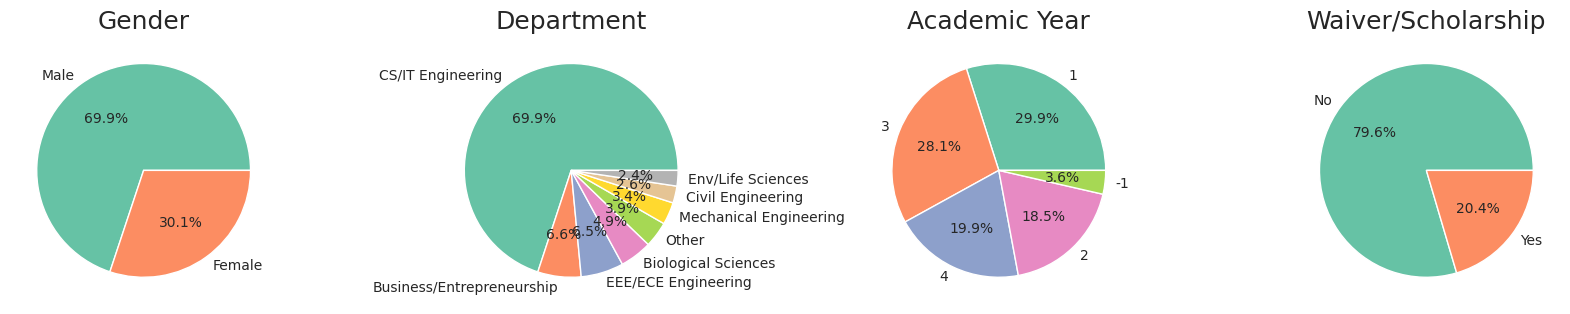

In [17]:
palette = sns.color_palette("Set2")
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
plt.pie(df["Gender"].value_counts(), labels=df["Gender"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Gender",fontsize= 18)

plt.subplot(1,4,2)
plt.pie(df["Department"].value_counts(), labels=df["Department"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Department",fontsize= 18)

plt.subplot(1,4,3)
plt.pie(df["Academic Year"].value_counts(), labels=df["Academic Year"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Academic Year",fontsize= 18)

plt.subplot(1,4,4)
plt.pie(df["Waiver/Scholarship"].value_counts(), labels=df["Waiver/Scholarship"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Waiver/Scholarship",fontsize= 18)

plt.subplots_adjust(wspace=0.6,hspace=0.5)
plt.show()

<div class="visualizaion-container" style="background-color: #ffbf69; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #000000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> Insights</h1>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #000000;">
        <li><strong>Gender Imbalance: </strong>The dataset is predominantly male, with males making up 69.9% and females 30.1%.</li>
        <li><strong>Dominant Department: </strong>CS/IT Engineering is the largest department by far, accounting for 69.9% of the students, while other departments have much smaller representation.</li>
        <li><strong>Academic Year Trends:</strong> The distribution shows the highest concentration in the first year (29.9%) and a noticeable decline in numbers as students advance to higher years.</li>
        <li><strong>Scholarship Distribution:</strong> A significant majority of students (70.1%) do not receive waivers or scholarships, with 29.9% benefiting from them.</li>
        <li><strong>Skewed Representation:</strong> There is a marked skew in the dataset toward male students and those in CS/IT Engineering programs.</li>
    </ul>
</div>


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">4.2 </span>  Are there differences in the distribution of depression, anxiety, and stress between males and females?</h3>
</div>



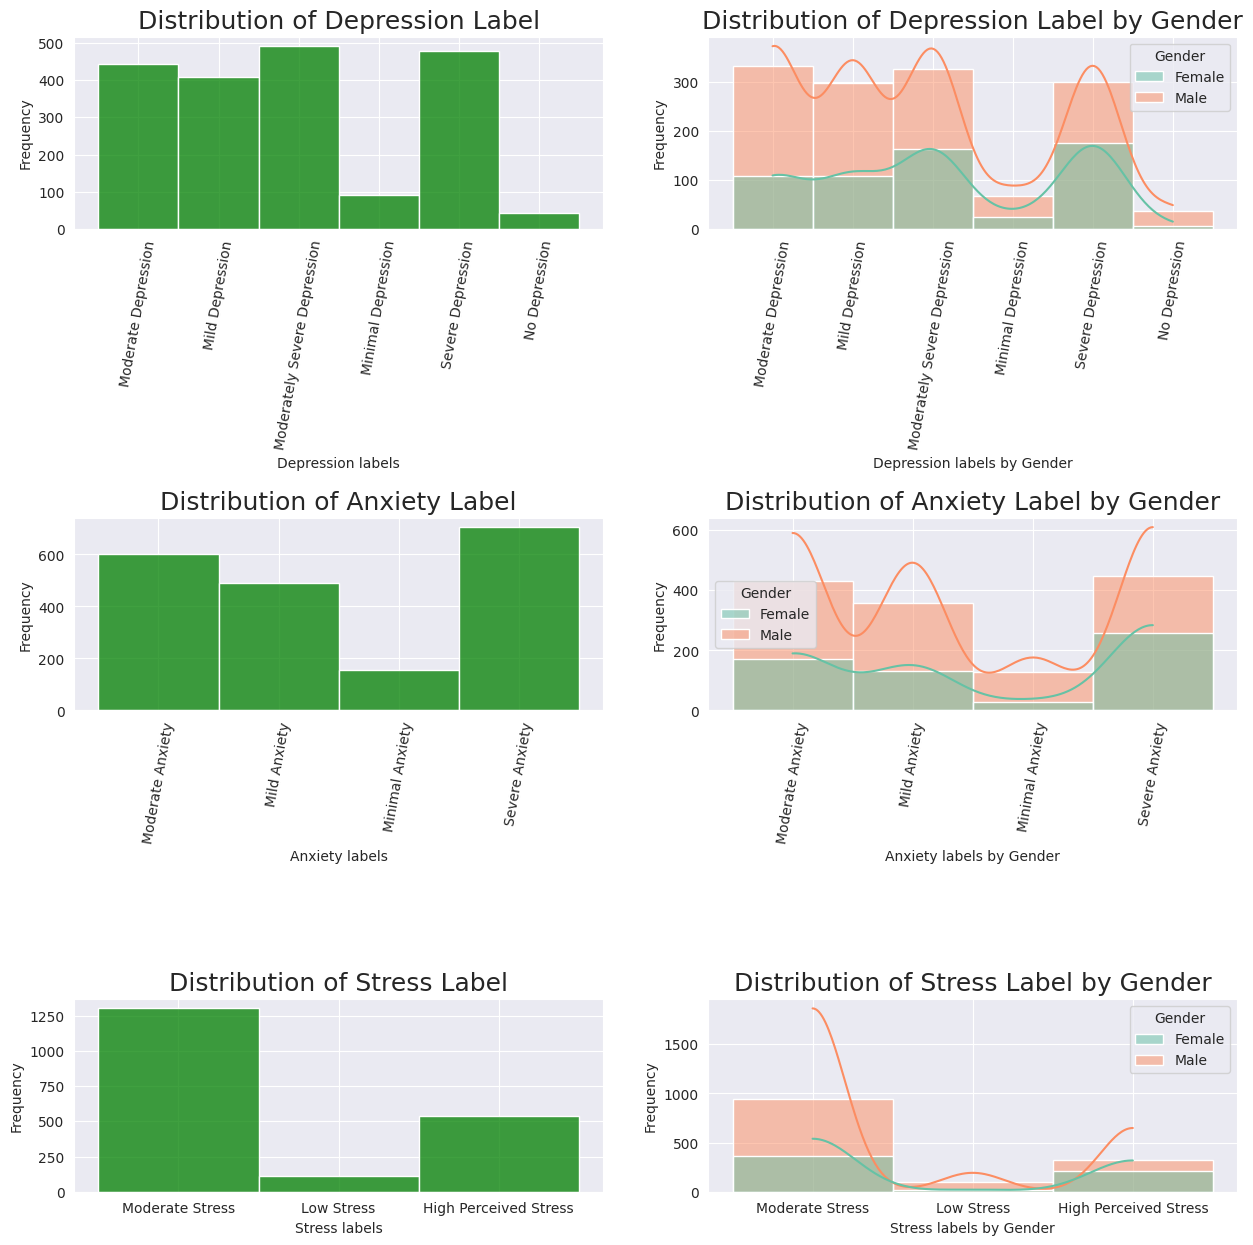

In [18]:
plt.figure(figsize=(15,15))
sns.set_style("darkgrid")

plt.subplot(3,2,1)
sns.histplot(data=df, x="Depression Label", color="g")
plt.title("Distribution of Depression Label",fontsize= 18)
plt.xlabel("Depression labels")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3,2,2)
sns.histplot(data=df, x="Depression Label", kde=True, palette=palette, hue="Gender")
plt.title("Distribution of Depression Label by Gender",fontsize= 18)
plt.xlabel("Depression labels by Gender")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3,2,3)
sns.histplot(data=df, x="Anxiety Label", color="g")
plt.title("Distribution of Anxiety Label",fontsize= 18)
plt.xlabel("Anxiety labels")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3,2,4)
sns.histplot(data=df, x="Anxiety Label", kde=True, palette=palette, hue="Gender")
plt.title("Distribution of Anxiety Label by Gender",fontsize= 18)
plt.xlabel("Anxiety labels by Gender")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3,2,5)
sns.histplot(data=df, x="Stress Label", color="g")
plt.title("Distribution of Stress Label",fontsize= 18)
plt.xlabel("Stress labels")
plt.ylabel("Frequency")

plt.subplot(3,2,6)
sns.histplot(data=df, x="Stress Label", kde=True, palette=palette, hue="Gender")
plt.title("Distribution of Stress Label by Gender",fontsize= 18)
plt.xlabel("Stress labels by Gender")
plt.ylabel("Frequency")


plt.subplots_adjust(wspace=0.2,hspace=1.5)
plt.show()

<div class="visualizaion-container" style="background-color: #ffbf69; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #000000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> Insights</h1>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #000000;">
        <li>Both genders report similar overall depression levels, but a slightly higher proportion of males experience moderate to severe depression compared to females.</li>
        <li>Males report higher levels of anxiety, with a greater percentage in the moderate and severe anxiety categories compared to females.</li>
        <li>The distribution of stress levels is relatively balanced between genders, showing no significant differences in stress levels reported.</li>
    </ul>
</div>


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">4.3 </span>  How does Anxiety varies with having Scholarship in Different Universities</h3>
</div>



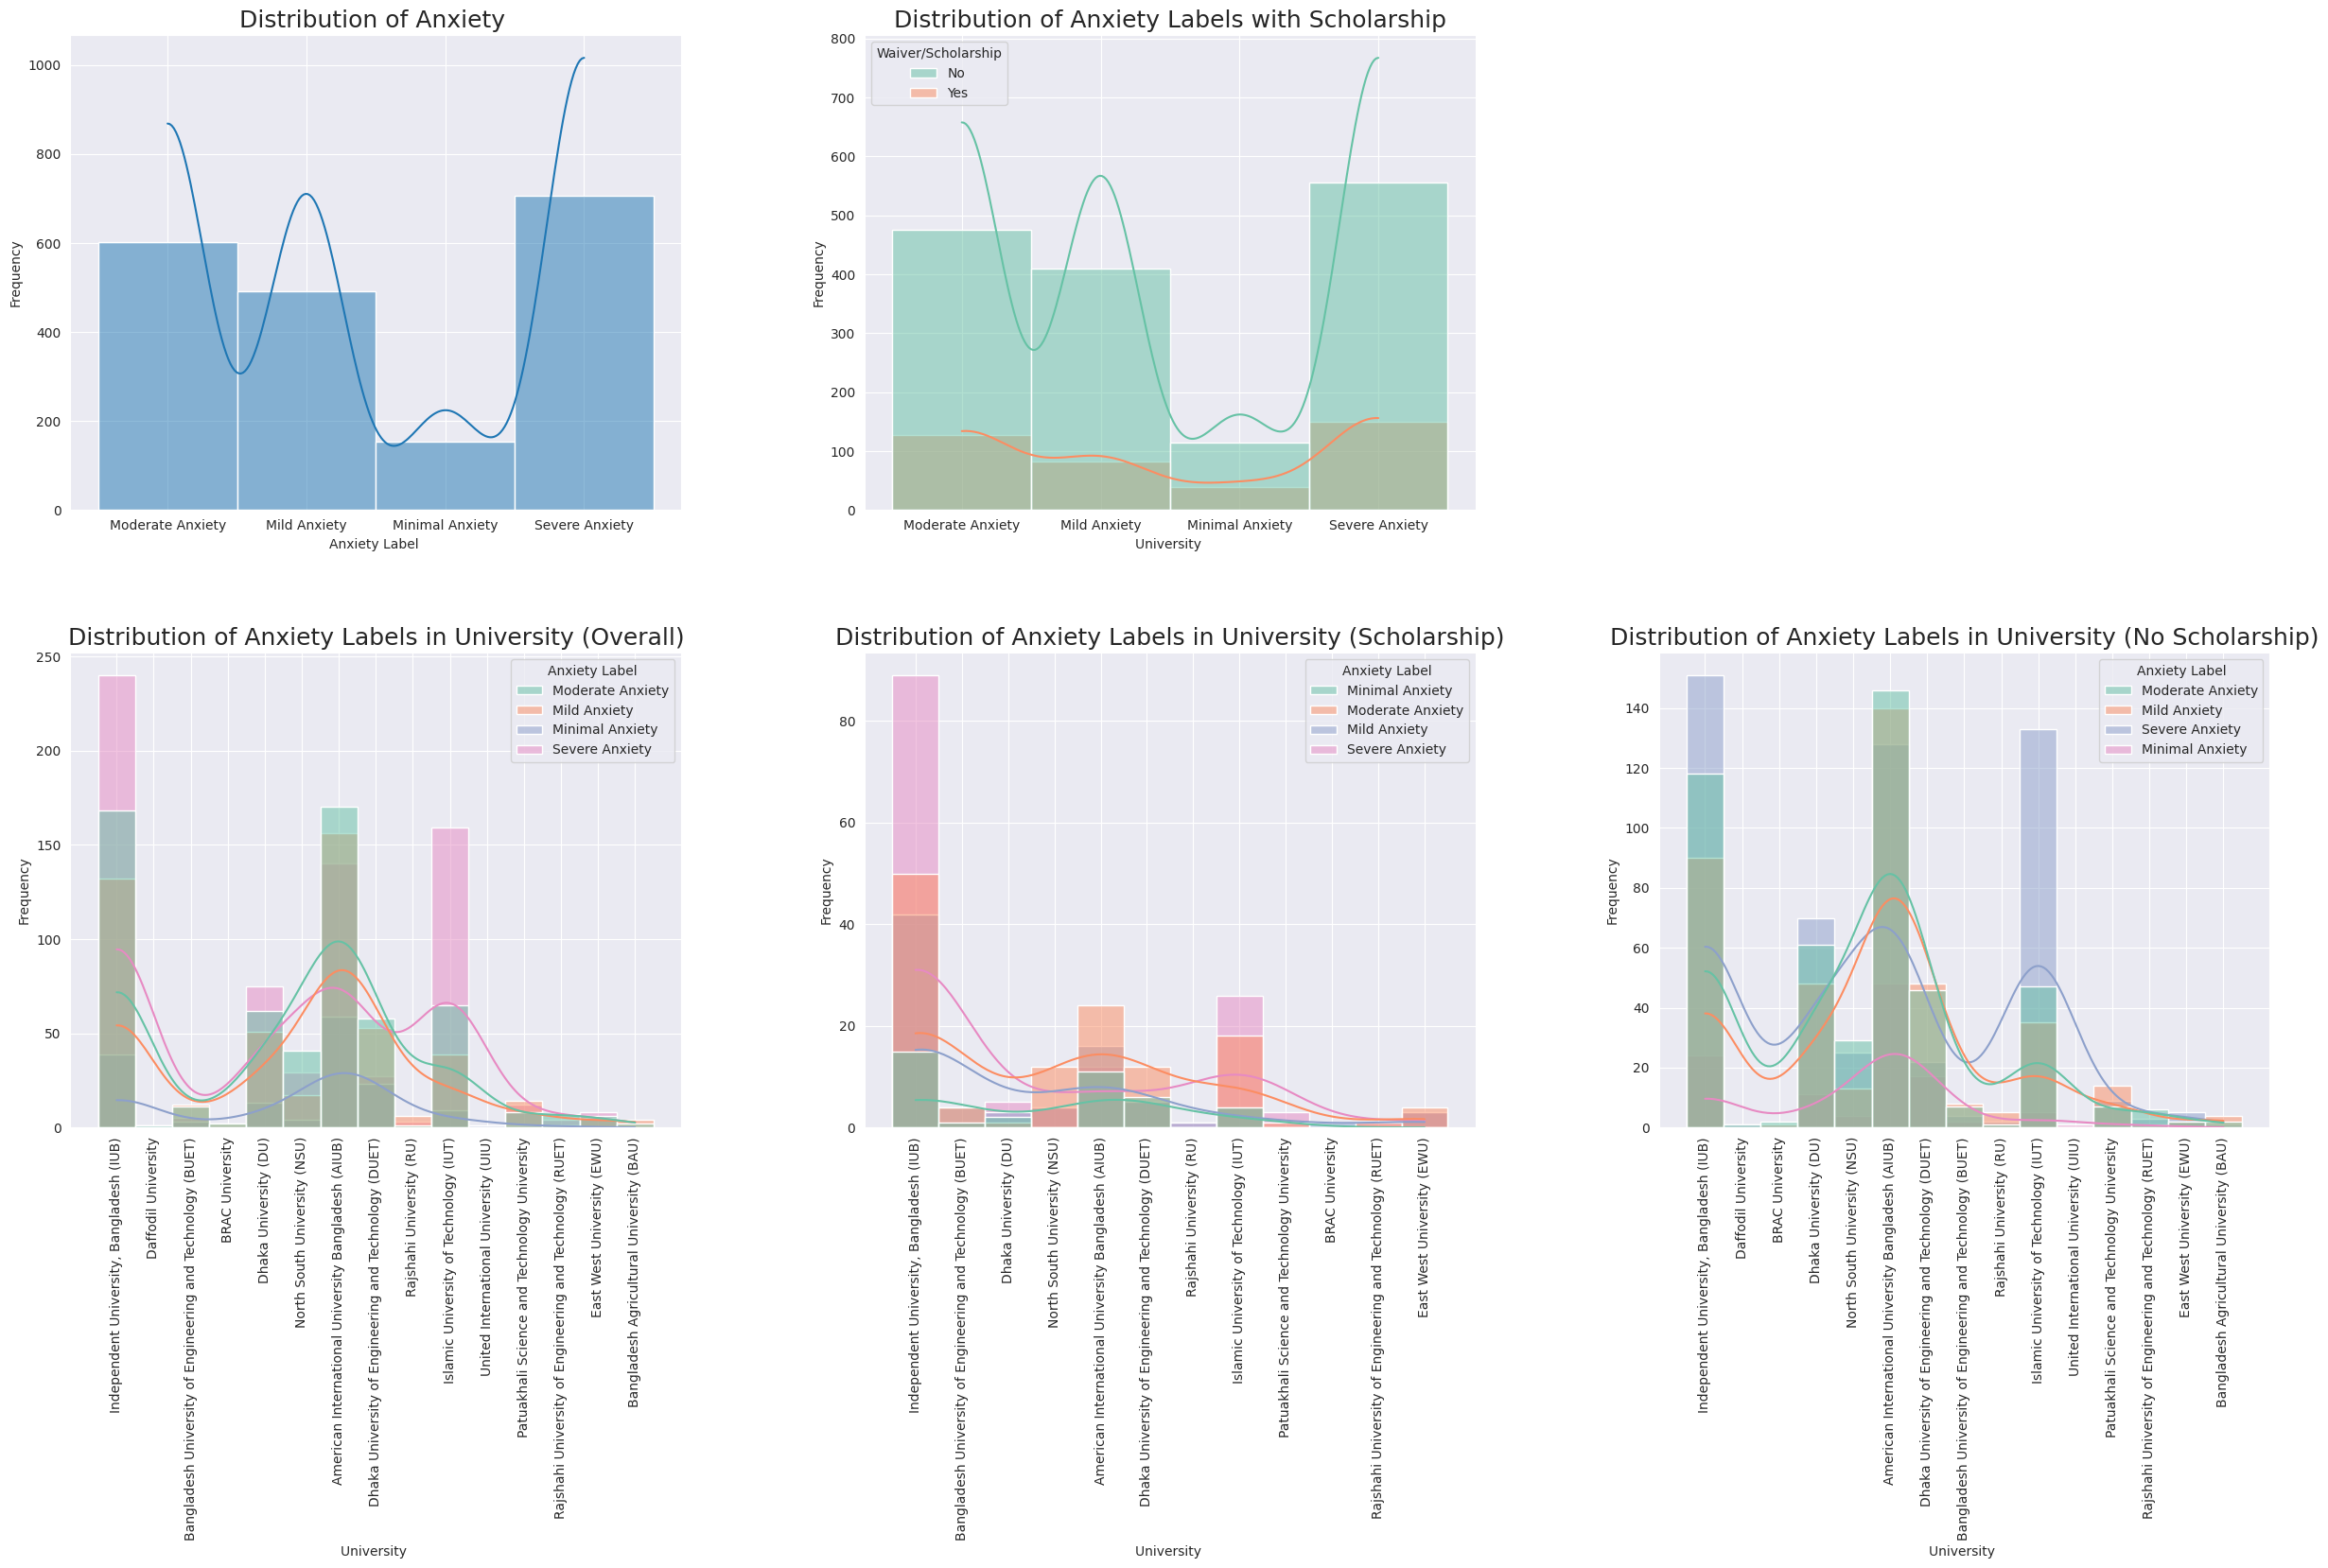

In [19]:
plt.figure(figsize=(30,15))
sns.set_style("darkgrid")

plt.subplot(2,3,1)
sns.histplot(data=df, x="Anxiety Label", kde=True, palette=palette)
plt.title("Distribution of Anxiety ", fontsize=18)
plt.xlabel("Anxiety Label ")
plt.ylabel("Frequency")

plt.subplot(2,3,2)
sns.histplot(data=df, x="Anxiety Label", kde=True, hue="Waiver/Scholarship", palette=palette)
plt.title("Distribution of Anxiety Labels with Scholarship", fontsize=18)
plt.xlabel("University ")
plt.ylabel("Frequency")

plt.subplot(2,3,4)
sns.histplot(data=df, x="University", kde=True, hue="Anxiety Label", palette=palette)
plt.title("Distribution of Anxiety Labels in University (Overall)", fontsize=18)
plt.xlabel("University ")
plt.ylabel("Frequency")
plt.xticks(rotation= 90)

plt.subplot(2,3,5)
sns.histplot(data=(df[df["Waiver/Scholarship"] == "Yes"]), x="University", kde=True, hue="Anxiety Label", palette=palette)
plt.title("Distribution of Anxiety Labels in University (Scholarship)", fontsize=18)
plt.xlabel("University ")
plt.ylabel("Frequency")
plt.xticks(rotation= 90)

plt.subplot(2,3,6)
sns.histplot(data=(df[df["Waiver/Scholarship"] == "No"]), x="University", kde=True, hue="Anxiety Label", palette=palette)
plt.title("Distribution of Anxiety Labels in University (No Scholarship)", fontsize=18)
plt.xlabel("University ")
plt.ylabel("Frequency")
plt.xticks(rotation= 90)

plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

<div class="visualizaion-container" style="background-color: #ffbf69; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #000000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> Insights</h1>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #000000;">
        <li>There appears to be a <strong>mixed influence </strong> of scholarships on anxiety levels.
        <ul><li> Some universities with a higher proportion of scholarship holders exhibit lower anxiety levels. This could suggest that financial aid alleviates some financial stress, contributing to lower anxiety.</li>
        <li>Other universities with a high scholarship rate show higher anxiety levels. This might be due to factors like increased academic pressure or competition among scholarship recipients.</li>
    </ul>
</div>



<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">4.4 </span>  How do gender, department, academic year, and age interact to influence suicidal thoughts?
</h3>
</div>

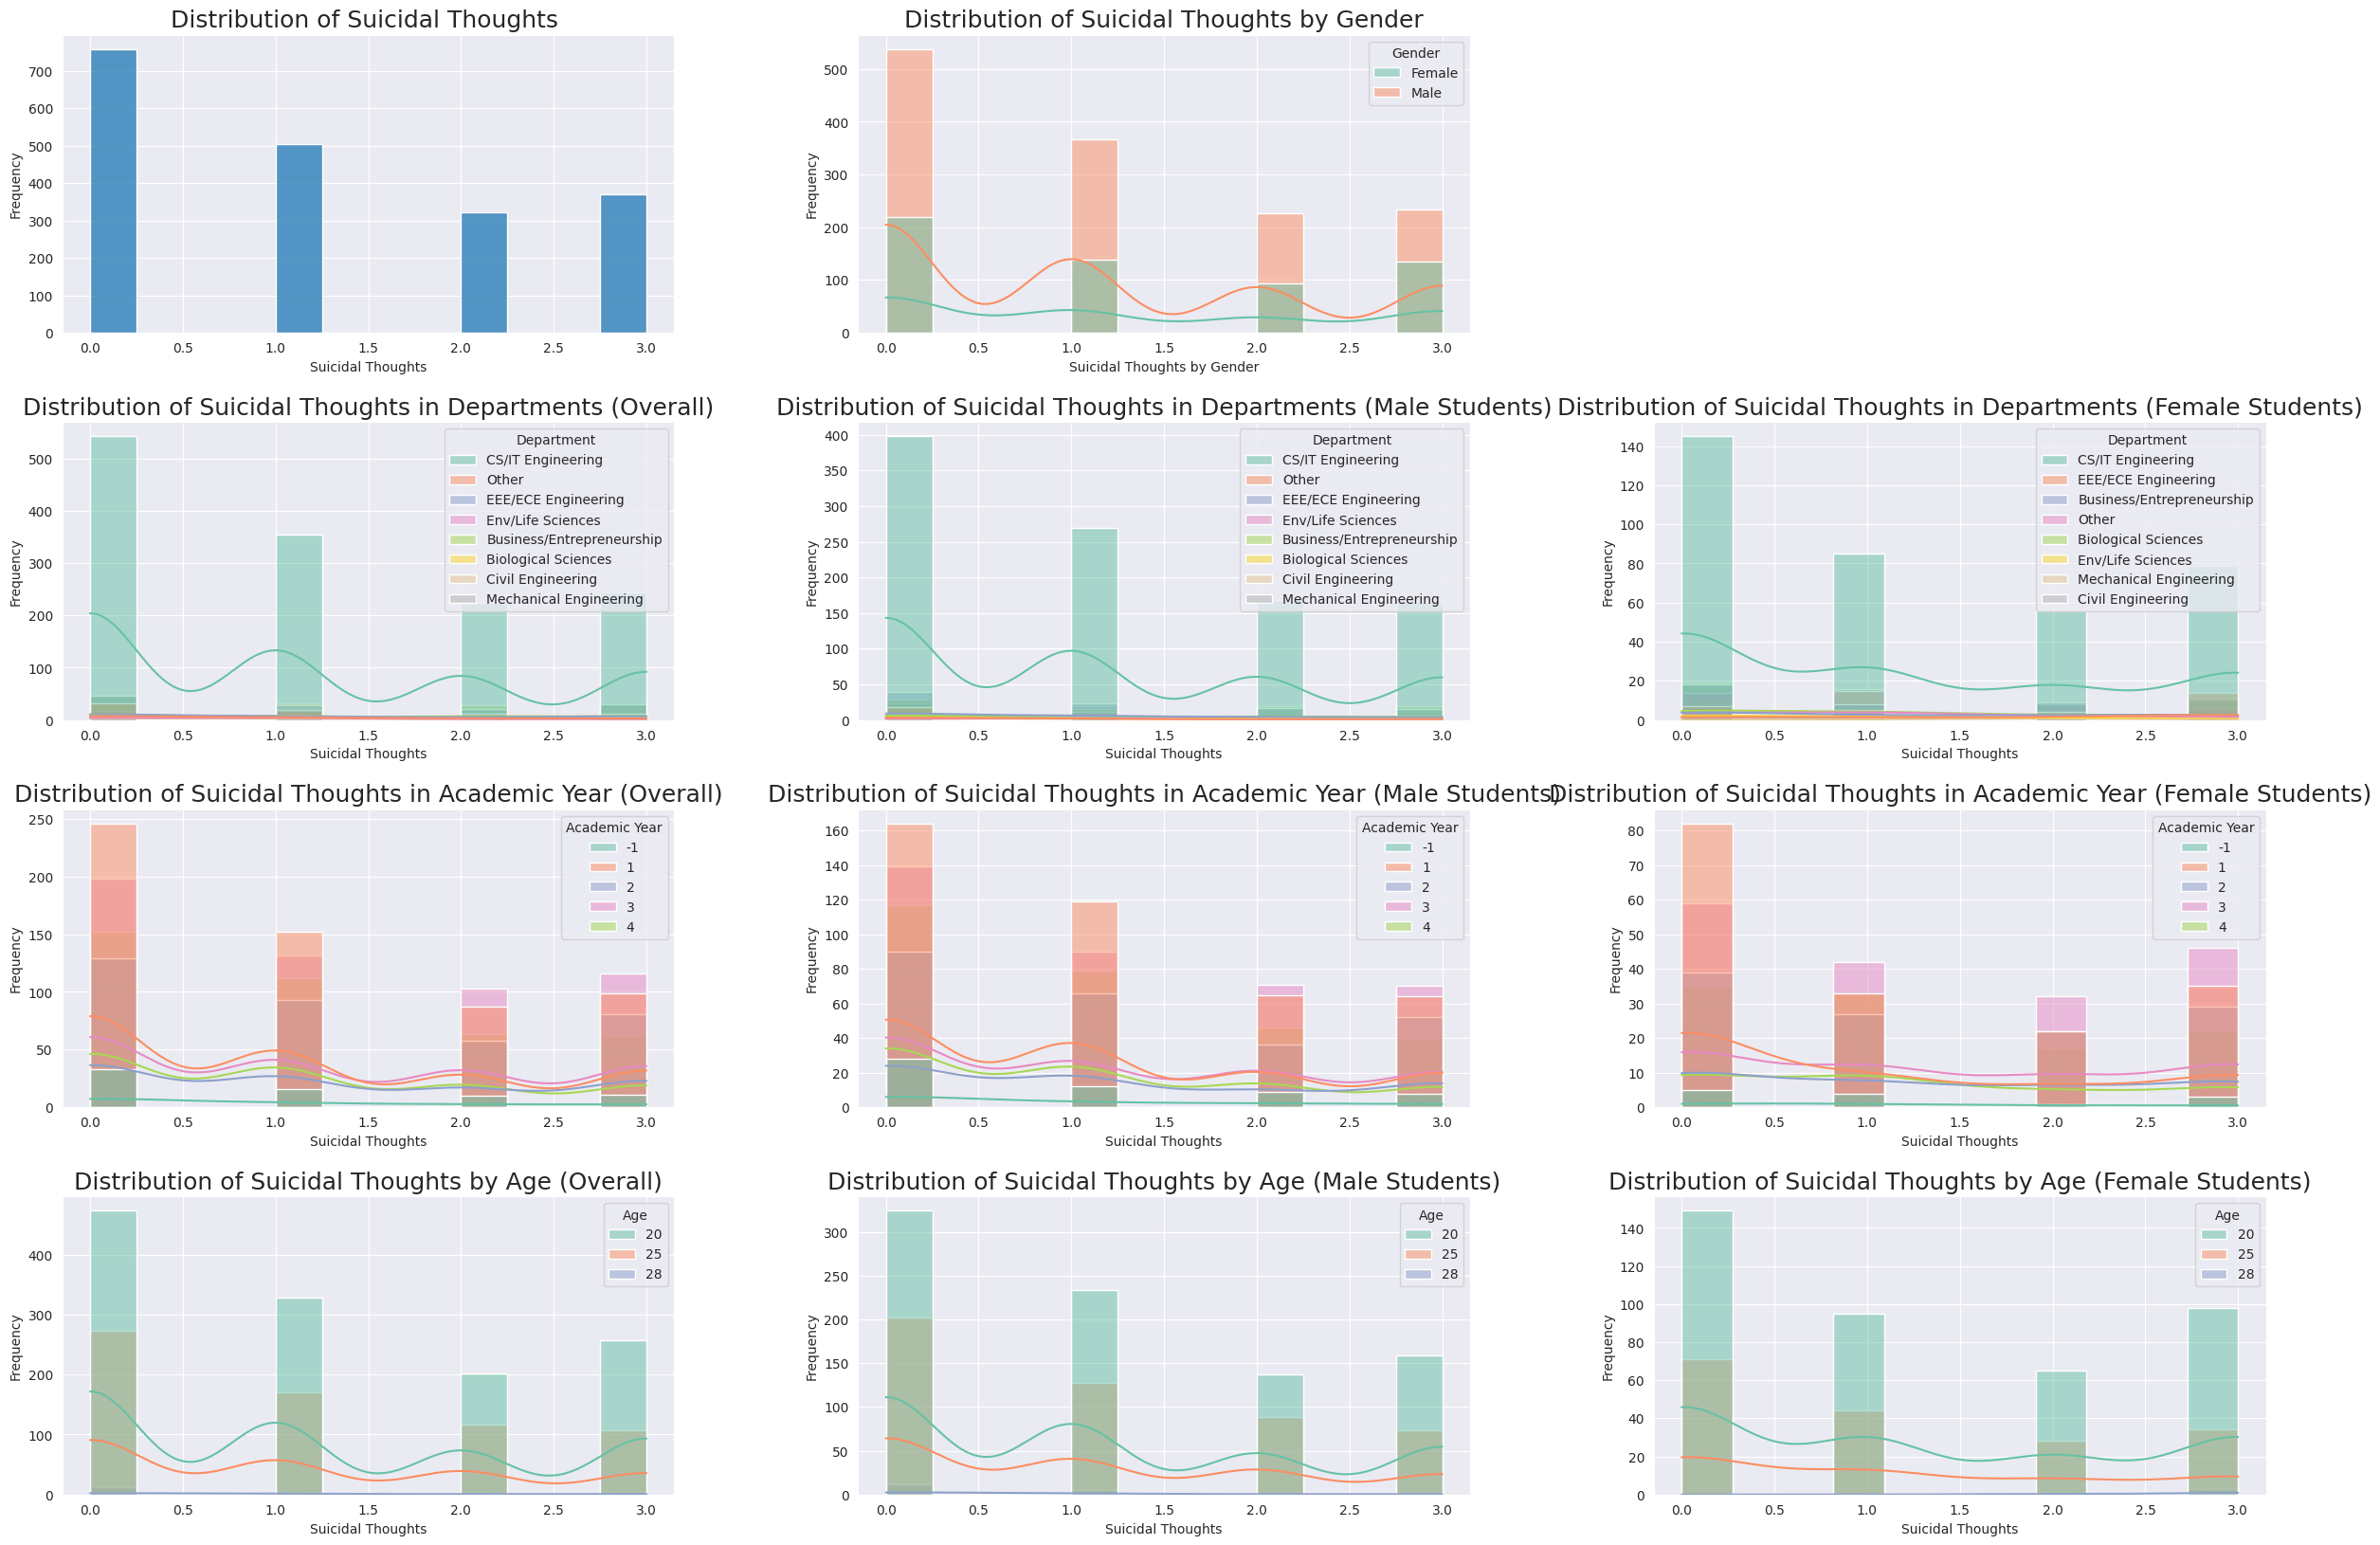

In [20]:
plt.figure(figsize=(30,20))

plt.subplot(4,3,1)
sns.histplot(data=df, x="Suicidal Thoughts")
plt.title("Distribution of Suicidal Thoughts ",fontsize= 18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,2)
sns.histplot(data=df, x="Suicidal Thoughts", palette=palette, kde=True, hue="Gender")
plt.title("Distribution of Suicidal Thoughts by Gender",fontsize= 18)
plt.xlabel("Suicidal Thoughts by Gender")
plt.ylabel("Frequency")

plt.subplot(4,3,4)
sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="Department", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Departments (Overall)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,5)
sns.histplot(data=df[df.Gender == "Male"], x="Suicidal Thoughts", kde=True, hue="Department", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Departments (Male Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,6)
sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=True, hue="Department", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Departments (Female Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,7)
sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="Academic Year", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Academic Year (Overall)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,8)
sns.histplot(data=df[df.Gender == "Male"], x="Suicidal Thoughts", kde=True, hue="Academic Year", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Academic Year (Male Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,9)
sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=True, hue="Academic Year", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Academic Year (Female Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,10)
sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="Age", palette=palette)
plt.title("Distribution of Suicidal Thoughts by Age (Overall)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,11)
sns.histplot(data=df[df.Gender == "Male"], x="Suicidal Thoughts", kde=True, hue="Age", palette=palette)
plt.title("Distribution of Suicidal Thoughts by Age (Male Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,12)
sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=True, hue="Age", palette=palette)
plt.title("Distribution of Suicidal Thoughts by Age (Female Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")


plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

<div class="visualizaion-container" style="background-color: #ffbf69; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #000000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> Insights</h1>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #000000;">
        <li><strong>Gender Differences: </strong>The graph highlights that male students consistently report higher levels of suicidal thoughts compared to female students, across all severity levels.</li>
        <li><strong>Departmental Variations: </strong>The data shows that suicidal thoughts are more prevalent in certain departments, such as CSE and ECE, with a higher frequency of mild to moderate thoughts in these fields.</li>
        <li><strong>Academic Year Impact:</strong> The distribution of suicidal thoughts fluctuates among different academic years.</li>
        <li><strong>Age-Related Patterns:</strong> There is variability in the distribution of suicidal thoughts across different age groups.</li>
        <li><strong>Certain subgroups exhibit higher risk factors for suicidal thoughts, specifically:</strong>
        <ul><li> <strong>Male Engineering Students: </strong>Male students, particularly those in engineering fields like CSE and ECE, report higher frequencies of suicidal thoughts compared to their female counterparts.</li>
        <li><strong>First-Year Students: </strong>While fluctuations are present, initial data suggests that first-year students might experience notable levels of suicidal thoughts, which could be related to the transitional challenges they face.</li>
        </ul></li>
    </ul>
</div>



<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">4.5 </span>  How do Age, academic year, and Currrent CGPA influence Depression, Anxiety and Stress?
</h3>
</div>

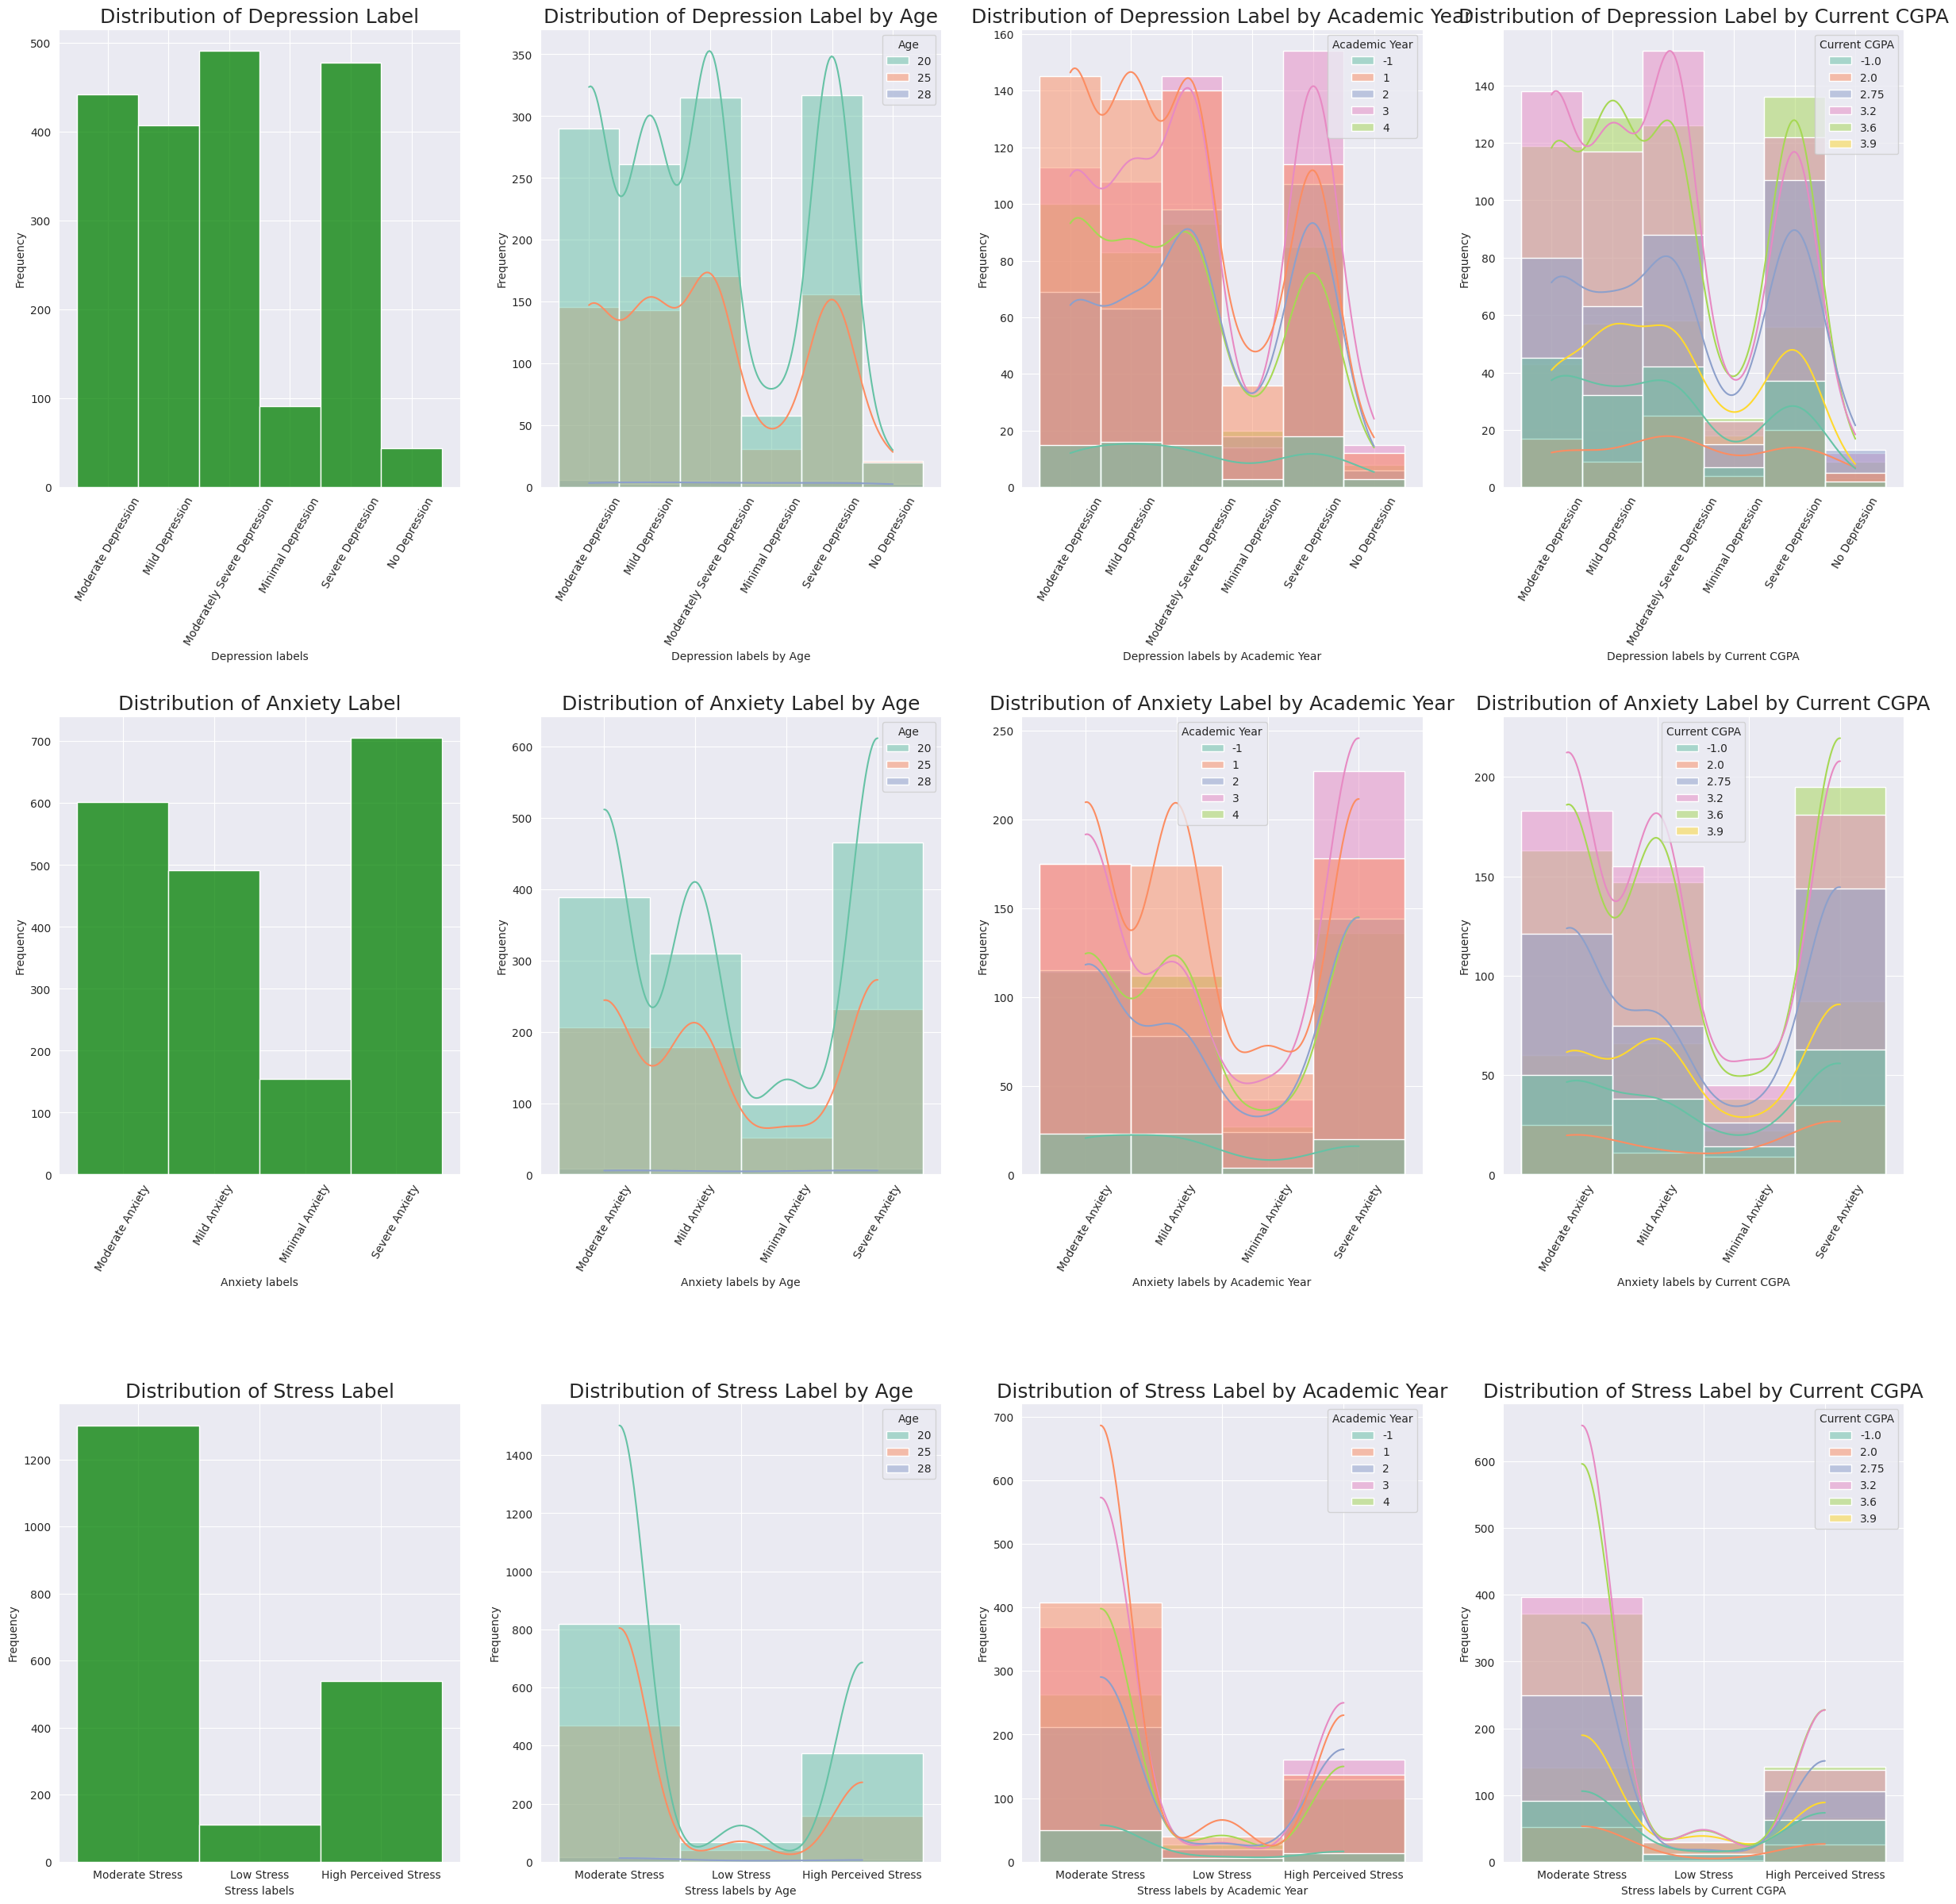

In [21]:
plt.figure(figsize=(30,30))

plt.subplot(3,4,1)
sns.histplot(data=df, x="Depression Label", color="g")
plt.title("Distribution of Depression Label",fontsize= 18)
plt.xlabel("Depression labels")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,2)
sns.histplot(data=df, x="Depression Label", palette=palette, kde=True, hue="Age")
plt.title("Distribution of Depression Label by Age",fontsize= 18)
plt.xlabel("Depression labels by Age")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,3)
sns.histplot(data=df, x="Depression Label", palette=palette, kde=True, hue="Academic Year")
plt.title("Distribution of Depression Label by Academic Year",fontsize= 18)
plt.xlabel("Depression labels by Academic Year")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,4)
sns.histplot(data=df, x="Depression Label", palette=palette, kde=True, hue="Current CGPA")
plt.title("Distribution of Depression Label by Current CGPA",fontsize= 18)
plt.xlabel("Depression labels by Current CGPA")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,5)
sns.histplot(data=df, x="Anxiety Label", color="g")
plt.title("Distribution of Anxiety Label",fontsize= 18)
plt.xlabel("Anxiety labels")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,6)
sns.histplot(data=df, x="Anxiety Label", palette=palette, kde=True, hue="Age")
plt.title("Distribution of Anxiety Label by Age",fontsize= 18)
plt.xlabel("Anxiety labels by Age")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,7)
sns.histplot(data=df, x="Anxiety Label", palette=palette, kde=True, hue="Academic Year")
plt.title("Distribution of Anxiety Label by Academic Year",fontsize= 18)
plt.xlabel("Anxiety labels by Academic Year")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,8)
sns.histplot(data=df, x="Anxiety Label", palette=palette, kde=True, hue="Current CGPA")
plt.title("Distribution of Anxiety Label by Current CGPA",fontsize= 18)
plt.xlabel("Anxiety labels by Current CGPA")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,9)
sns.histplot(data=df, x="Stress Label", color="g")
plt.title("Distribution of Stress Label",fontsize= 18)
plt.xlabel("Stress labels")
plt.ylabel("Frequency")

plt.subplot(3,4,10)
sns.histplot(data=df, x="Stress Label", palette=palette, kde=True, hue="Age")
plt.title("Distribution of Stress Label by Age",fontsize= 18)
plt.xlabel("Stress labels by Age")
plt.ylabel("Frequency")

plt.subplot(3,4,11)
sns.histplot(data=df, x="Stress Label", palette=palette, kde=True, hue="Academic Year")
plt.title("Distribution of Stress Label by Academic Year",fontsize= 18)
plt.xlabel("Stress labels by Academic Year")
plt.ylabel("Frequency")

plt.subplot(3,4,12)
sns.histplot(data=df, x="Stress Label", palette=palette, kde=True, hue="Current CGPA")
plt.title("Distribution of Stress Label by Current CGPA",fontsize= 18)
plt.xlabel("Stress labels by Current CGPA")
plt.ylabel("Frequency")

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

<div class="visualizaion-container" style="background-color: #ffbf69; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #000000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> Insights</h1>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #000000;">
        <li><strong>Academic Year Impact:</strong>
        <ul><li> Stress levels are highest among first-year students, reflecting the challenges of transitioning to university life.</li>
        <li>There is a noticeable decrease in stress levels as students advance through their academic years, indicating improved adaptation and coping strategies..</li>
        </ul></li>
        <li><strong>CGPA Correlation:</strong>
        <ul><li> Students with higher GPAs report lower stress levels, particularly notable among those with GPAs above 3.5. This suggests a link between academic success and stress management.</li>
        </ul></li>
        <li><strong>Age-Related Patterns:</strong>
        <ul><li> Younger students tend to report slightly higher levels of stress, with a slight decrease in stress as age increases.</li>
        <li>The distribution of stress across age groups remains relatively consistent, but older students generally report lower average stress values.</li>
        </ul></li>
        <li>These insights suggest that academic performance and age have notable impacts on mental health indicators, with first-year students and those with lower GPAs facing higher levels of stress and related issues.</li>
    </ul>
</div>



<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">4.6 </span>  Heatmap of Correlations: Anxiety, Stress, and Depression
</h3>
</div>

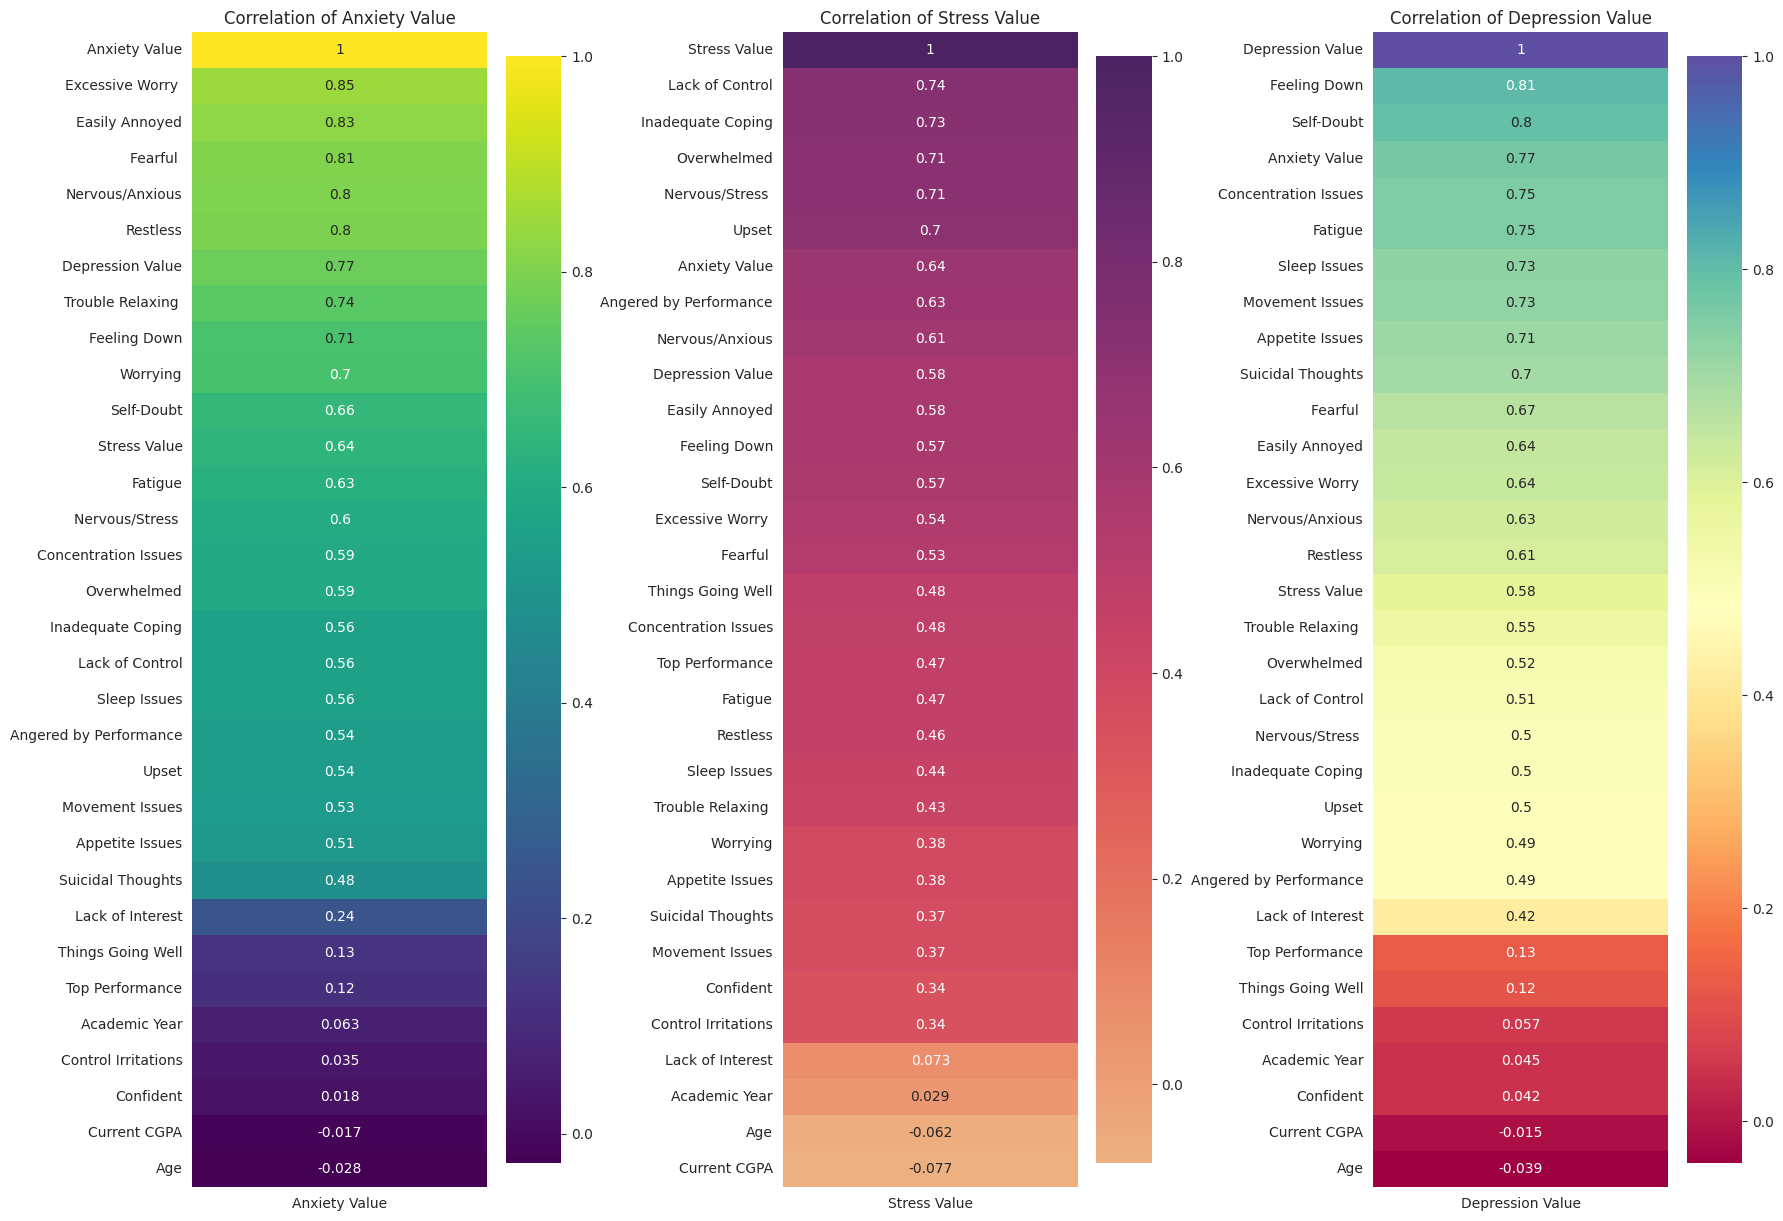

In [22]:
plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
sns.heatmap(data=df[numerica_columns].corr()["Anxiety Value"].sort_values(ascending=False).to_frame(), annot=True, cmap="viridis" )
plt.title("Correlation of Anxiety Value")

plt.subplot(1,3,2)
sns.heatmap(data=df[numerica_columns].corr()["Stress Value"].sort_values(ascending=False).to_frame(), annot=True, cmap="flare" )
plt.title("Correlation of Stress Value")

plt.subplot(1,3,3)
sns.heatmap(data=df[numerica_columns].corr()["Depression Value"].sort_values(ascending=False).to_frame(), annot=True, cmap="Spectral" )
plt.title("Correlation of Depression Value")

plt.subplots_adjust(wspace=0.6)
plt.show()

<div  style="background-color: #ffbf69; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #000000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> Insights</h1>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #000000;">
        <li><strong>Core Components of Anxiety:</strong>
        <ul><li> Factors such as excessive worry, being easily annoyed, fearfulness, nervousness/anxiety, restlessness, and trouble relaxing show strong correlations with anxiety. These elements are central to the experience of anxiety.</li>
        </ul></li>
        <li><strong>Overlap with Depression and Stress:</strong>
        <ul><li> Depression and anxiety are strongly linked, indicating that symptoms like feeling down, self-doubt, and fatigue often co-occur with high anxiety.</li>
        <li>  Similarly, stress is positively correlated with anxiety, with factors such as lack of control, inadequate coping, and feeling overwhelmed contributing to both stress and anxiety.</li>
        <li>  There is considerable overlap between anxiety, stress, and depression, suggesting these emotional states are interconnected and frequently co-occur.</li>
        </ul></li>
        <li><strong>Core Symptoms of Depression:</strong>
        <ul><li>Depression is strongly associated with factors like feeling down, self-doubt, concentration issues, and sleep disturbances, highlighting these as primary symptoms of depression.</li>
        </ul></li>
        <li><strong>Minimal Impact of Demographic Factors:</strong>
        <ul><li>Academic year, age, and current CGPA appear to have a minimal effect on levels of anxiety, stress, and depression, indicating that these emotional states may be more influenced by other factors beyond demographics.</li>
        </ul></li>
    </ul>
</div>

<div style="background-color: #ECFFE6; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h3 style="color: #164B01; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"><span style="color: #164B01 ;"> 5.</span>  Data Preprocessing</h3>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #333;">
        <li>Encode Categorical Columns</li>
        <li>Feature Selection</li>
        <li>Scaling Features</li>
        <li>Splitting Data For Training and Testing</li>
        <li>Check If Class Distribution is Balanced or Not?</li>
        <li>Oversampling</li>
    </ul>
</div>


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">5.1 </span>  Encode Categorical Columns  
</h3>
</div>

In [23]:
encoder = LabelEncoder()
for i in categorical_columns:
    df[i] = encoder.fit_transform(df[[i]])

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">5.2 </span>  Feature Selection
</h3>
</div>


<p style="font-size: 18px; color: #000000;"><strong>
Excluding ["Anxiety Label","Anxiety Value", "Stress Label", "Stress Value",  "Depression Value", "Depression Label"]] from input variables.Including these labels as input features can lead to data leakage because they are directly related to the outcome you are trying to predict, "Depression Label". The model could effectively learn the label from these features, which doesn't reflect real-world prediction scenarios. </strong>
</p>


In [24]:
x = df.drop(columns=["Anxiety Label","Anxiety Value", "Stress Label", "Stress Value",  "Depression Value", "Depression Label"])
y=df[["Anxiety Label", "Stress Label", "Depression Label"]]

y_anxiety = df["Anxiety Label"]
y_Stress = df["Stress Label"]
y_Depression = df["Depression Label"]

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">5.3 </span>  Scaling Features
</h3>
</div>

In [25]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">5.4 </span>  Splitting Data For Training and Testing
</h3>
</div>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_test, y_train_Anxiety, y_test_Anxiety = train_test_split(x, y_anxiety, test_size=0.2, random_state=42)
X_train, X_test, y_train_Stress, y_test_Stress = train_test_split(x, y_Stress, test_size=0.2, random_state=42)
X_train, X_test, y_train_Depression, y_test_Depression = train_test_split(x, y_Depression, test_size=0.2, random_state=42)


<p style="font-size: 18px; color: #000000;"><strong>
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) splits the dataset into training and testing sets for the overall model, while subsequent lines split the data separately for anxiety, stress, and depression to evaluate each condition individually. </strong>
</p>

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">5.5 </span>  Check If Class Distribution is Balanced or Not?
</h3>
</div>

In [27]:
print("Anxiety Train Class Distribution:")
print(y_train_Anxiety.value_counts())

print("\nStress Train Class Distribution:")
print(y_train_Stress.value_counts())

print("\nDepression Train Class Distribution:")
print(y_train_Depression.value_counts())


Anxiety Train Class Distribution:
Anxiety Label
3    570
2    486
0    378
1    128
Name: count, dtype: int64

Stress Train Class Distribution:
Stress Label
2    1042
0     431
1      89
Name: count, dtype: int64

Depression Train Class Distribution:
Depression Label
3    392
5    386
2    350
0    317
1     78
4     39
Name: count, dtype: int64


<div class="visualizaion-container" style="background-color: #ffbf69; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #000000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> Insight</h1>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #000000;">
        <li>The class distribution in the training data for anxiety, stress, and depression labels shows significant imbalances.These imbalances suggest the need for techniques like resampling.
        </li>
    </ul>
</div>

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">5.6 </span>  Oversampling
</h3>
</div>

In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_Anxiety, y_train_Anxiety = ros.fit_resample(X_train, y_train_Anxiety)
X_train_Stress, y_train_Stress = ros.fit_resample(X_train, y_train_Stress)
X_train_Depression, y_train_Depression = ros.fit_resample(X_train, y_train_Depression)

print("Anxiety Train Class Distribution After Oversampling:")
print(pd.Series(y_train_Anxiety).value_counts())

print("\nStress Train Class Distribution After Oversampling:")
print(pd.Series(y_train_Stress).value_counts())

print("\nDepression Train Class Distribution After Oversampling:")
print(pd.Series(y_train_Depression).value_counts())


Anxiety Train Class Distribution After Oversampling:
Anxiety Label
2    570
3    570
0    570
1    570
Name: count, dtype: int64

Stress Train Class Distribution After Oversampling:
Stress Label
0    1042
2    1042
1    1042
Name: count, dtype: int64

Depression Train Class Distribution After Oversampling:
Depression Label
3    392
5    392
2    392
0    392
4    392
1    392
Name: count, dtype: int64


<div style="background-color: #ECFFE6; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h3 style="color: #164B01; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"><span style="color: #164B01 ;"> 6.</span>  Model Training</h3>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #333;">
        <li>Select Best Model To Predict Anxiety, Stress and Depression</li>
        <li>Visualize Models Evaluations on Each Condition</li>
        <li>Train Best Models</li>
        <li>Combine The Results</li>
        <li>Prediction</li>
    </ul>
</div>

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">6.1 </span>  Select Best Model To Predict Anxiety, Stress and Depression
</h3>
</div>

Depression - K-Neighbors Classifier's accuracy: 66.7519
              precision    recall  f1-score   support

           0       0.60      0.80      0.68        90
           1       0.47      0.69      0.56        13
           2       0.64      0.35      0.45        92
           3       0.67      0.73      0.70        99
           4       0.29      0.40      0.33         5
           5       0.85      0.80      0.83        92

    accuracy                           0.67       391
   macro avg       0.59      0.63      0.59       391
weighted avg       0.68      0.67      0.66       391



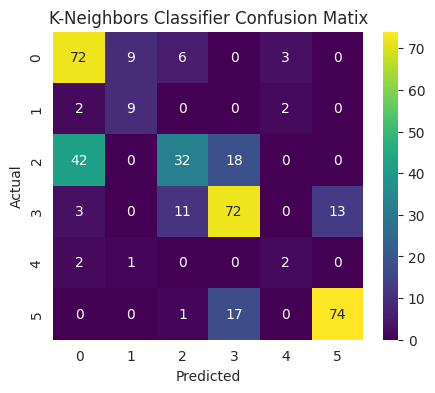

---------------------------------------------------------------------- 

Depression - Support Vector Classifier's accuracy: 92.0716
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        90
           1       0.69      0.85      0.76        13
           2       0.89      0.89      0.89        92
           3       0.92      0.95      0.94        99
           4       1.00      0.60      0.75         5
           5       1.00      0.96      0.98        92

    accuracy                           0.92       391
   macro avg       0.90      0.86      0.87       391
weighted avg       0.92      0.92      0.92       391



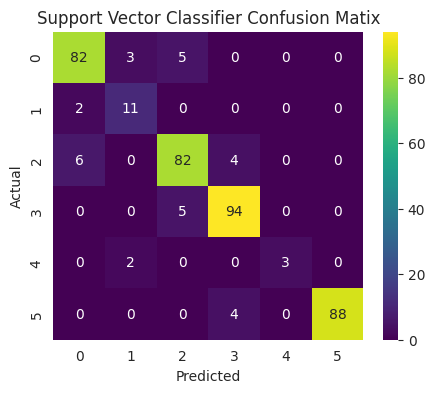

---------------------------------------------------------------------- 

Depression - Decision Tree Classifier's accuracy: 71.3555
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        90
           1       0.41      0.85      0.55        13
           2       0.65      0.62      0.63        92
           3       0.68      0.62      0.65        99
           4       1.00      1.00      1.00         5
           5       0.82      0.86      0.84        92

    accuracy                           0.71       391
   macro avg       0.72      0.78      0.74       391
weighted avg       0.72      0.71      0.71       391



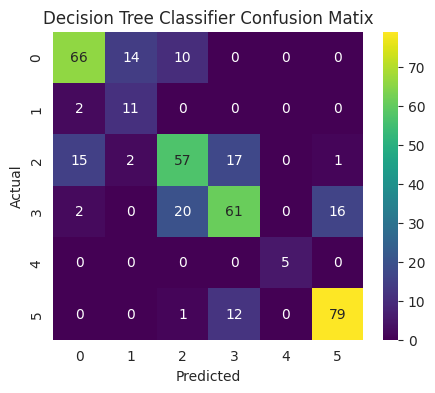

---------------------------------------------------------------------- 

Depression - Random Forest Classifier's accuracy: 84.9105
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        90
           1       0.77      0.77      0.77        13
           2       0.80      0.80      0.80        92
           3       0.80      0.83      0.82        99
           4       1.00      1.00      1.00         5
           5       0.91      0.90      0.91        92

    accuracy                           0.85       391
   macro avg       0.86      0.86      0.86       391
weighted avg       0.85      0.85      0.85       391



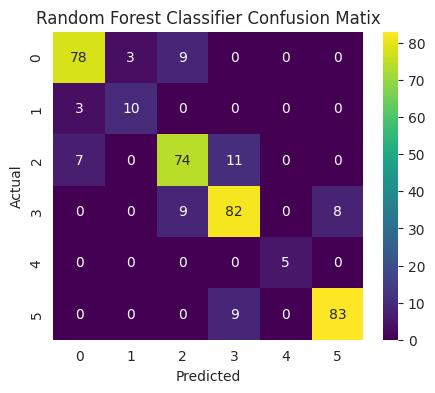

---------------------------------------------------------------------- 

Depression - Gradient Boosting Classifier's accuracy: 86.9565
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        90
           1       0.68      1.00      0.81        13
           2       0.88      0.76      0.81        92
           3       0.80      0.88      0.84        99
           4       1.00      1.00      1.00         5
           5       0.94      0.91      0.93        92

    accuracy                           0.87       391
   macro avg       0.87      0.91      0.88       391
weighted avg       0.88      0.87      0.87       391



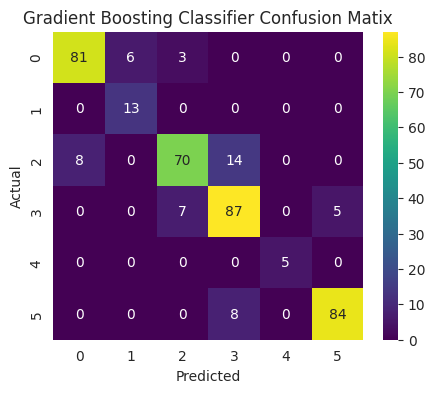

---------------------------------------------------------------------- 

Depression - XGBoost Classifier's accuracy: 88.7468
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        90
           1       0.79      0.85      0.81        13
           2       0.85      0.82      0.83        92
           3       0.85      0.89      0.87        99
           4       1.00      1.00      1.00         5
           5       0.95      0.96      0.95        92

    accuracy                           0.89       391
   macro avg       0.89      0.90      0.89       391
weighted avg       0.89      0.89      0.89       391



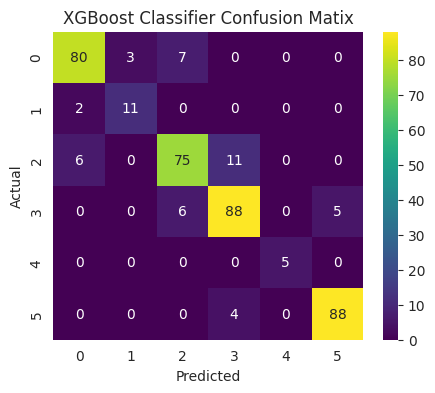

---------------------------------------------------------------------- 

Depression - AdaBoost Classifier's accuracy: 51.1509
              precision    recall  f1-score   support

           0       0.77      0.54      0.64        90
           1       0.12      0.08      0.10        13
           2       0.50      0.91      0.64        92
           3       0.40      0.56      0.46        99
           4       0.00      0.00      0.00         5
           5       0.92      0.12      0.21        92

    accuracy                           0.51       391
   macro avg       0.45      0.37      0.34       391
weighted avg       0.61      0.51      0.47       391



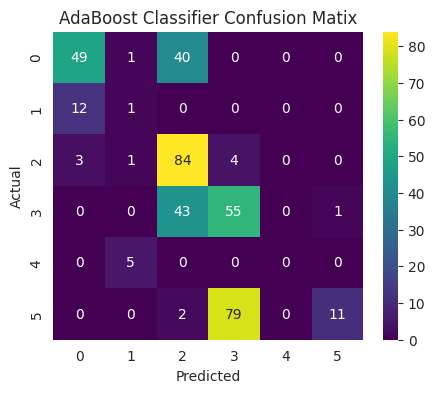

---------------------------------------------------------------------- 

Anxiety - K-Neighbors Classifier's accuracy: 80.0512
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       114
           1       0.67      0.62      0.64        26
           2       0.74      0.77      0.75       116
           3       0.96      0.82      0.88       135

    accuracy                           0.80       391
   macro avg       0.78      0.76      0.77       391
weighted avg       0.81      0.80      0.80       391



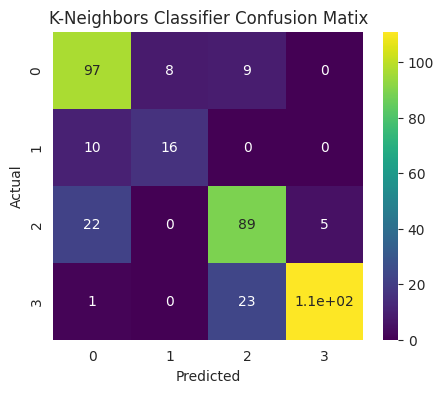

---------------------------------------------------------------------- 

Anxiety - Support Vector Classifier's accuracy: 93.3504
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       114
           1       0.86      0.73      0.79        26
           2       0.92      0.95      0.93       116
           3       0.98      0.96      0.97       135

    accuracy                           0.93       391
   macro avg       0.92      0.89      0.90       391
weighted avg       0.93      0.93      0.93       391



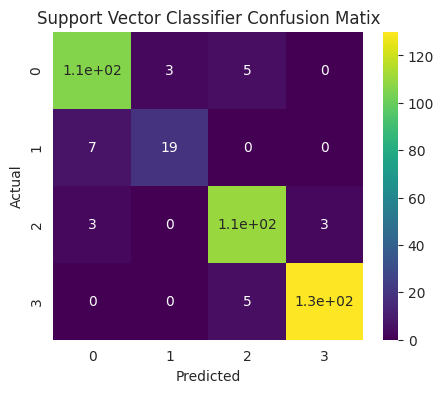

---------------------------------------------------------------------- 

Anxiety - Decision Tree Classifier's accuracy: 81.8414
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       114
           1       0.71      0.58      0.64        26
           2       0.79      0.72      0.75       116
           3       0.88      0.93      0.91       135

    accuracy                           0.82       391
   macro avg       0.79      0.77      0.78       391
weighted avg       0.82      0.82      0.82       391



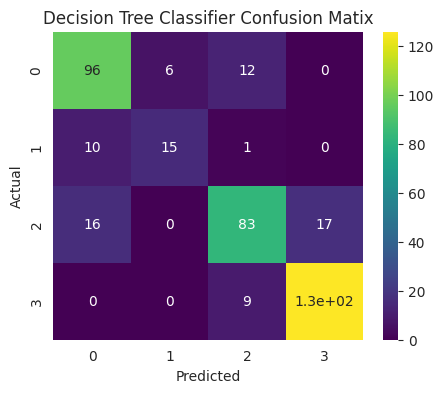

---------------------------------------------------------------------- 

Anxiety - Random Forest Classifier's accuracy: 89.7698
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.84      0.62      0.71        26
           2       0.87      0.90      0.89       116
           3       0.95      0.96      0.96       135

    accuracy                           0.90       391
   macro avg       0.88      0.84      0.86       391
weighted avg       0.90      0.90      0.90       391



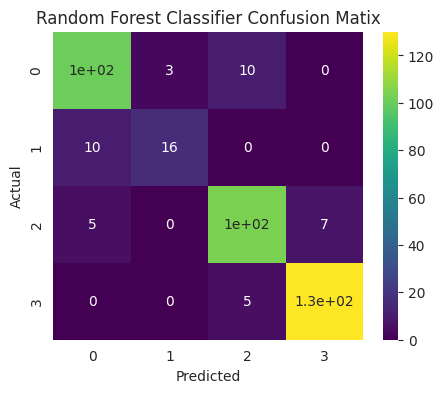

---------------------------------------------------------------------- 

Anxiety - Gradient Boosting Classifier's accuracy: 94.1176
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       114
           1       0.84      0.81      0.82        26
           2       0.96      0.92      0.94       116
           3       0.96      0.99      0.97       135

    accuracy                           0.94       391
   macro avg       0.92      0.91      0.92       391
weighted avg       0.94      0.94      0.94       391



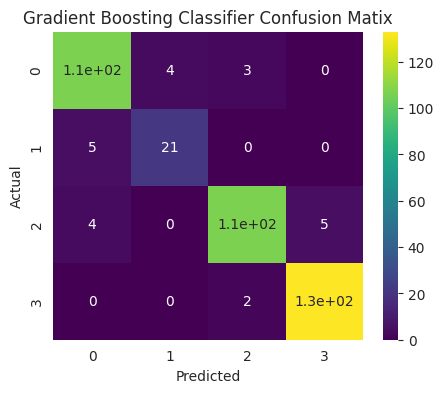

---------------------------------------------------------------------- 

Anxiety - XGBoost Classifier's accuracy: 92.8389
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       114
           1       0.86      0.73      0.79        26
           2       0.92      0.93      0.92       116
           3       0.96      0.99      0.97       135

    accuracy                           0.93       391
   macro avg       0.91      0.89      0.90       391
weighted avg       0.93      0.93      0.93       391



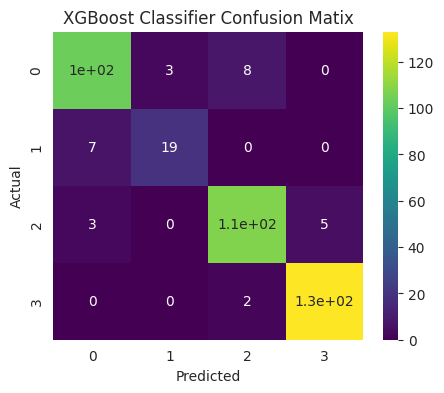

---------------------------------------------------------------------- 

Anxiety - AdaBoost Classifier's accuracy: 70.0767
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       114
           1       0.00      0.00      0.00        26
           2       0.57      0.91      0.70       116
           3       1.00      0.43      0.60       135

    accuracy                           0.70       391
   macro avg       0.58      0.58      0.54       391
weighted avg       0.73      0.70      0.66       391



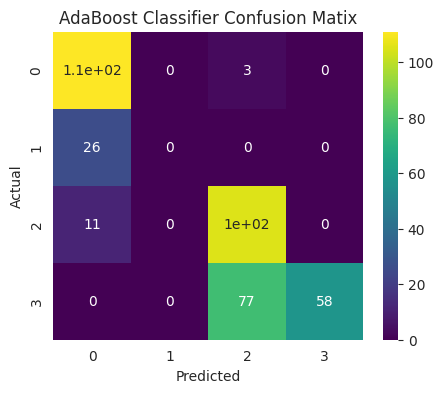

---------------------------------------------------------------------- 

Stress - K-Neighbors Classifier's accuracy: 86.445
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       109
           1       0.52      0.59      0.55        22
           2       0.92      0.87      0.90       260

    accuracy                           0.86       391
   macro avg       0.75      0.79      0.77       391
weighted avg       0.87      0.86      0.87       391



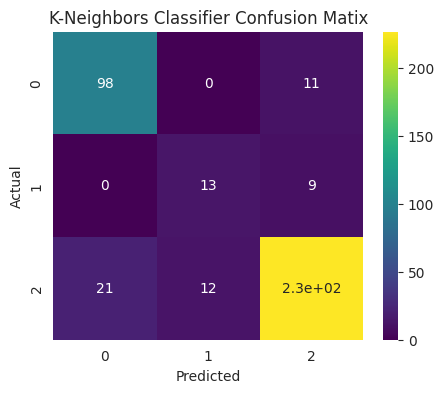

---------------------------------------------------------------------- 

Stress - Support Vector Classifier's accuracy: 96.6752
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       109
           1       0.85      1.00      0.92        22
           2       0.99      0.96      0.97       260

    accuracy                           0.97       391
   macro avg       0.93      0.98      0.95       391
weighted avg       0.97      0.97      0.97       391



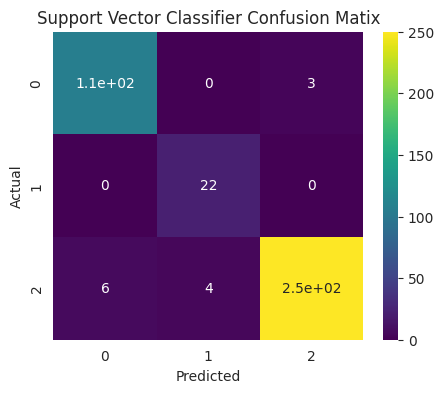

---------------------------------------------------------------------- 

Stress - Decision Tree Classifier's accuracy: 88.2353
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       109
           1       0.55      0.55      0.55        22
           2       0.91      0.91      0.91       260

    accuracy                           0.88       391
   macro avg       0.78      0.78      0.78       391
weighted avg       0.88      0.88      0.88       391



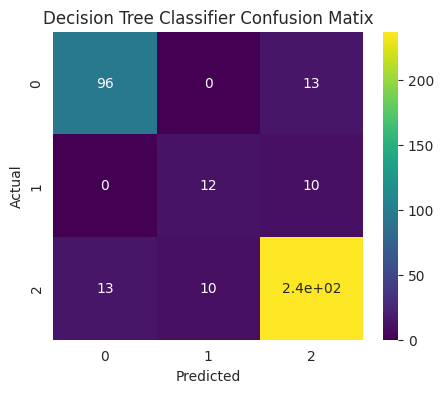

---------------------------------------------------------------------- 

Stress - Random Forest Classifier's accuracy: 92.3274
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       109
           1       0.93      0.59      0.72        22
           2       0.93      0.95      0.94       260

    accuracy                           0.92       391
   macro avg       0.92      0.82      0.86       391
weighted avg       0.92      0.92      0.92       391



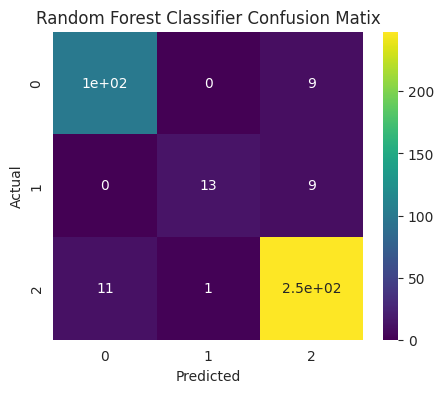

---------------------------------------------------------------------- 

Stress - Gradient Boosting Classifier's accuracy: 95.1407
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       109
           1       0.75      0.95      0.84        22
           2       0.99      0.94      0.96       260

    accuracy                           0.95       391
   macro avg       0.89      0.96      0.92       391
weighted avg       0.96      0.95      0.95       391



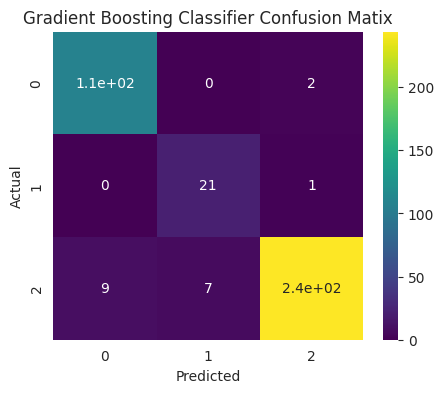

---------------------------------------------------------------------- 

Stress - XGBoost Classifier's accuracy: 94.1176
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       109
           1       0.80      0.91      0.85        22
           2       0.97      0.94      0.96       260

    accuracy                           0.94       391
   macro avg       0.89      0.93      0.91       391
weighted avg       0.94      0.94      0.94       391



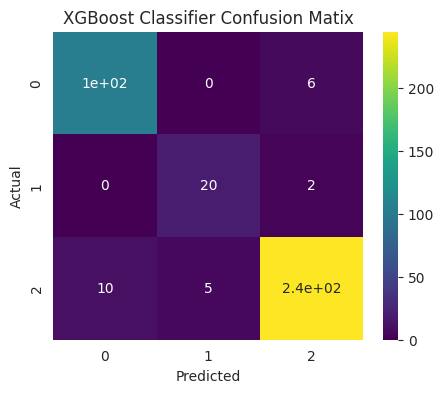

---------------------------------------------------------------------- 

Stress - AdaBoost Classifier's accuracy: 87.7238
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       109
           1       0.50      0.82      0.62        22
           2       0.94      0.87      0.90       260

    accuracy                           0.88       391
   macro avg       0.77      0.87      0.80       391
weighted avg       0.89      0.88      0.88       391



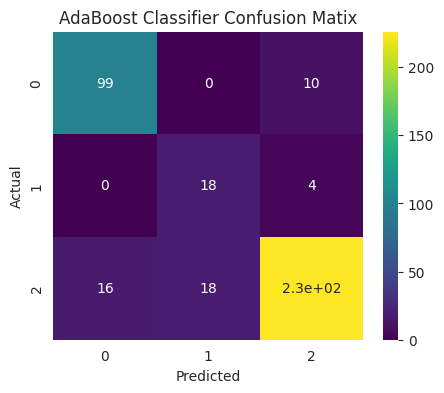

---------------------------------------------------------------------- 



In [29]:
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Classifier": SVC(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42)
}

conditions = ["Depression", "Anxiety", "Stress"]
results = []

for condition in conditions:
    if condition == "Depression":
        X_train, X_test, Y_train, Y_test = X_train_Depression, X_test, y_train_Depression, y_test_Depression
    elif condition == "Anxiety":
        X_train, X_test, Y_train, Y_test = X_train_Anxiety, X_test, y_train_Anxiety, y_test_Anxiety
    elif condition == "Stress":
        X_train, X_test, Y_train, Y_test = X_train_Stress, X_test, y_train_Stress, y_test_Stress

    for name, model in models.items():
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred) * 100
        cm = confusion_matrix(Y_test,Y_pred)
        results.append({"Condition": condition, "Model": name, "Accuracy": round(accuracy, 4)})

        print(f"{condition} - {name}'s accuracy: {round(accuracy, 4)}")
        print(classification_report(Y_test, Y_pred))

        plt.figure(figsize=(5,4))
        sns.heatmap(cm,annot=True, cmap="viridis")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{name} Confusion Matix")
        plt.show()
        print("-" * 70, "\n")

In [30]:
evaluation_df = pd.DataFrame(results)
evaluation_df

,Condition,Model,Accuracy
0,Depression,K-Neighbors Classifier,66.7519
1,Depression,Support Vector Classifier,92.0716
2,Depression,Decision Tree Classifier,71.3555
3,Depression,Random Forest Classifier,84.9105
4,Depression,Gradient Boosting Classifier,86.9565
5,Depression,XGBoost Classifier,88.7468
6,Depression,AdaBoost Classifier,51.1509
7,Anxiety,K-Neighbors Classifier,80.0512
8,Anxiety,Support Vector Classifier,93.3504
9,Anxiety,Decision Tree Classifier,81.8414


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">6.2 </span>  Visualize Models Evaluations on Each Condition
</h3>
</div>

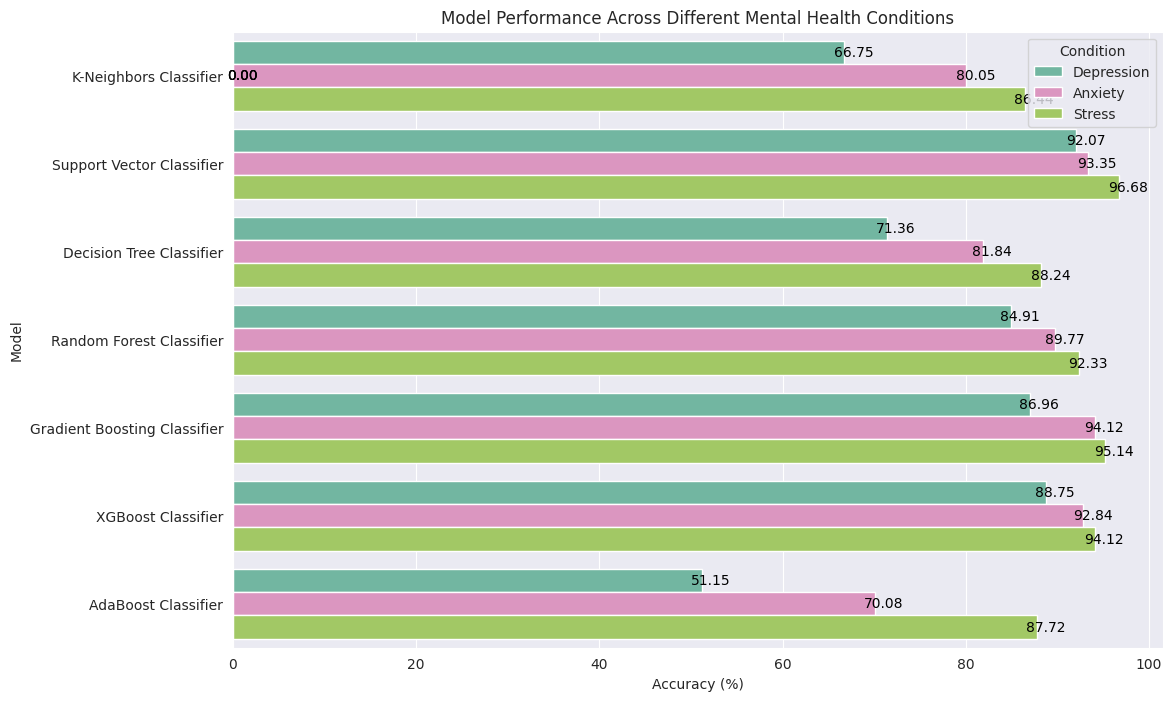

In [31]:
color = ['#66c2a5', '#e78ac3', '#a6d854', '#ffd92f']

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=evaluation_df, x="Accuracy", y="Model", hue="Condition", orient="h", palette=color)

for p in bar_plot.patches:
    width = p.get_width()
    bar_plot.text(width + 1, p.get_y() + p.get_height() / 2, f'{width:.2f}',
                  ha='center', va='center', color='black', fontsize=10)

plt.title("Model Performance Across Different Mental Health Conditions")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.show()

<div  style="background-color: #ffbf69; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #000000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> Insights</h1>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #000000;">
        <li><strong>Best Model for Anxiety Prediction: </strong> Gradient Boosting Classifier</li>
        <li><strong>Best Model for Stress Prediction: </strong> Support Vector Classifier</li>
        <li><strong>Best Model for Depression Prediction: </strong> Support Vector Classifier</li>
    </ul>
</div>


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">6.3 </span>  Train Best Models
</h3>
</div>

In [32]:
model_anxiety = GradientBoostingClassifier(random_state=42)
model_anxiety.fit(X_train_Anxiety, y_train_Anxiety)

model_stress = SVC(random_state=42)
model_stress.fit(X_train_Stress,y_train_Stress)

model_depression = SVC(random_state=42)
model_depression.fit(X_train_Depression,y_train_Depression)

SVC(random_state=42)

<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">6.4 </span>  Combine The Results
</h3>
</div>

In [33]:
def predict_all_labels(X_test):
    pred_anxiety = model_anxiety.predict(X_test)
    pred_stress = model_stress.predict(X_test)
    pred_depression = model_depression.predict(X_test)

    predictions = {
        "Anxiety Label": pred_anxiety,
        "Stress Label": pred_stress,
        "Depression Label": pred_depression
    }

    return predictions


<div>
    <h3 style="color: #164B01; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> <span style="color: #164B01 ;">6.5 </span>  Prediction
</h3>
</div>

In [34]:
predictions = predict_all_labels(X_test)
pred_df = pd.DataFrame(predictions)
y_test = pd.DataFrame(y_test)

<div style="background-color: #ECFFE6; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h3 style="color: #164B01; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"><span style="color: #164B01 ;"> 7.</span>  Model Evaluation</h3>
</div>


In [35]:
for label in ["Anxiety Label", "Stress Label", "Depression Label"]:
    print(f"Classification Report for {label}:")
    print(classification_report(y_test[label], pred_df[label]))


Classification Report for Anxiety Label:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       114
           1       0.84      0.81      0.82        26
           2       0.96      0.92      0.94       116
           3       0.96      0.99      0.97       135

    accuracy                           0.94       391
   macro avg       0.92      0.91      0.92       391
weighted avg       0.94      0.94      0.94       391

Classification Report for Stress Label:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       109
           1       0.85      1.00      0.92        22
           2       0.99      0.96      0.97       260

    accuracy                           0.97       391
   macro avg       0.93      0.98      0.95       391
weighted avg       0.97      0.97      0.97       391

Classification Report for Depression Label:
              precision    recall  f1-score   support

    

<div style="background-color: #ECFFE6; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h3 style="color: #164B01; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"><span style="color: #164B01 ;"> 8.</span>  Conclusion</h3>
</div>


<div  style="background-color: #795019; padding: 20px; border: 2px solid #ECFFE6; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #FFDFB2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;"> Based on the comprehensive analysis of the dataset and various model performances, several key insights have emerged.</h1>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #FFECD1;">
        <li><strong>Demographic Insights:</strong>
        <ul><li><strong>Gender: </strong>There is a higher prevalence of suicidal thoughts among fmale students compared to males. This suggests a need for targeted mental health support for female students.</li>
        <li><strong>Department:</strong> Departments such as CSE and ECE have higher frequencies of mild to moderate suicidal thoughts, indicating a potential area for additional mental health resources and interventions.</li>
        <li><strong>Academic Year:</strong> First-year students report the highest stress levels, which decrease as students progress through their academic journey, reflecting an adaptation to university life over time.</li>
        <li><strong>Age and CGPA:</strong> Younger students and those with lower GPAs report higher levels of stress, anxiety, and depression. This correlation suggests that academic performance and age may influence mental health, highlighting the importance of support systems for younger and academically struggling students.</li>
        </ul></li>
        <li><strong>Impact of Scholarships:</strong>
        <ul><li> The influence of scholarships on anxiety levels is mixed. While some universities with high scholarship rates show lower anxiety, others exhibit higher anxiety levels, potentially due to increased academic pressure or competition among scholarship recipients.</li>
        </ul></li>
        <li><strong>Correlation Between Mental Health Indicators:</strong>
        <ul><li>Anxiety, stress, and depression are strongly interconnected. Core factors such as excessive worry, lack of control, and feelings of being overwhelmed are highly correlated with anxiety and stress, while symptoms like feeling down, self-doubt, and sleep issues are central to depression. This overlap indicates a complex interplay between these emotional states.</li>
        </ul></li>
        <li><strong>Best Models for Mental Health Predictions:</strong>
        <ul><li><strong>Depression: </strong>Support Vector Machine (SVM) has shown the highest accuracy in predicting depression, suggesting its effectiveness in handling the complexity of depression labels.</li>
        <li><strong>Stress: </strong>SVM also performs best for stress prediction, demonstrating its robustness in differentiating stress levels.</li>
        <li><strong>Anxiety: </strong>Gradient Boosting Classifier is the most effective for predicting anxiety, highlighting its strength in capturing anxiety patterns.</li>
        </ul></li>
    </ul>
</div>


<font size="+2" color=#FB3537 ><b>If you like my work, please consider upvoting my kernel. Let's support each other!</b></font>
